## Question 1

In [190]:
import pandas as pd
import pandas_datareader.data as web
import datetime

def gather_data(data_codes, #dict
                start, #start date (datetime)
                end = datetime.datetime.today(), #end date (datetime)
               freq="M"): #str "D","W","M","Q","A", also "2D", etc...
    df_init = False
    for name, code in data_codes.items():
        if df_init == False:
            # .resample(freq) adjusts frequency, 
            #   choose .first(), .last(). mean(), median(), etc...
            df = web.DataReader(
                code, "fred", start, end).resample(freq).mean()
            df.rename(columns = {code:name}, inplace = True)
            df_init = True
        else:
            df[name] = web.DataReader(
                code, "fred", start, end).resample(freq).mean()
    return df

def bil_to_mil(series):
    return series * 10 ** 3

start = datetime.datetime(1985,1,1)
end = datetime.datetime.today()
freq = "Q"

In [191]:
from datlib.plots import *

data_codes1 = {"Monetary Base": "BOGMBASE",
            "Currency in Circulation": "MBCURRCIR"}

data_codes2 = {"Gross Domestic Product": "GDP",
            "Real Gross Domestic Product": "GDPC1"}

data_codes3 = {"U.S. / Euro Foreign Exchange Rate": "DEXUSEU",
            "U.S. / U.K. Foreign Exchange Rate": "DEXUSUK"}

dataset1 = gather_data(data_codes1,
                  start,
                  end,
                  freq)

dataset2 = gather_data(data_codes2,
                  start,
                  end,
                  freq)

dataset3 = gather_data(data_codes3,
                  start,
                  end,
                  freq)

Monetary Base is the total balance maintained plus the currency in circulation. So, currency in circulation is a part of the equation to find monetary base.

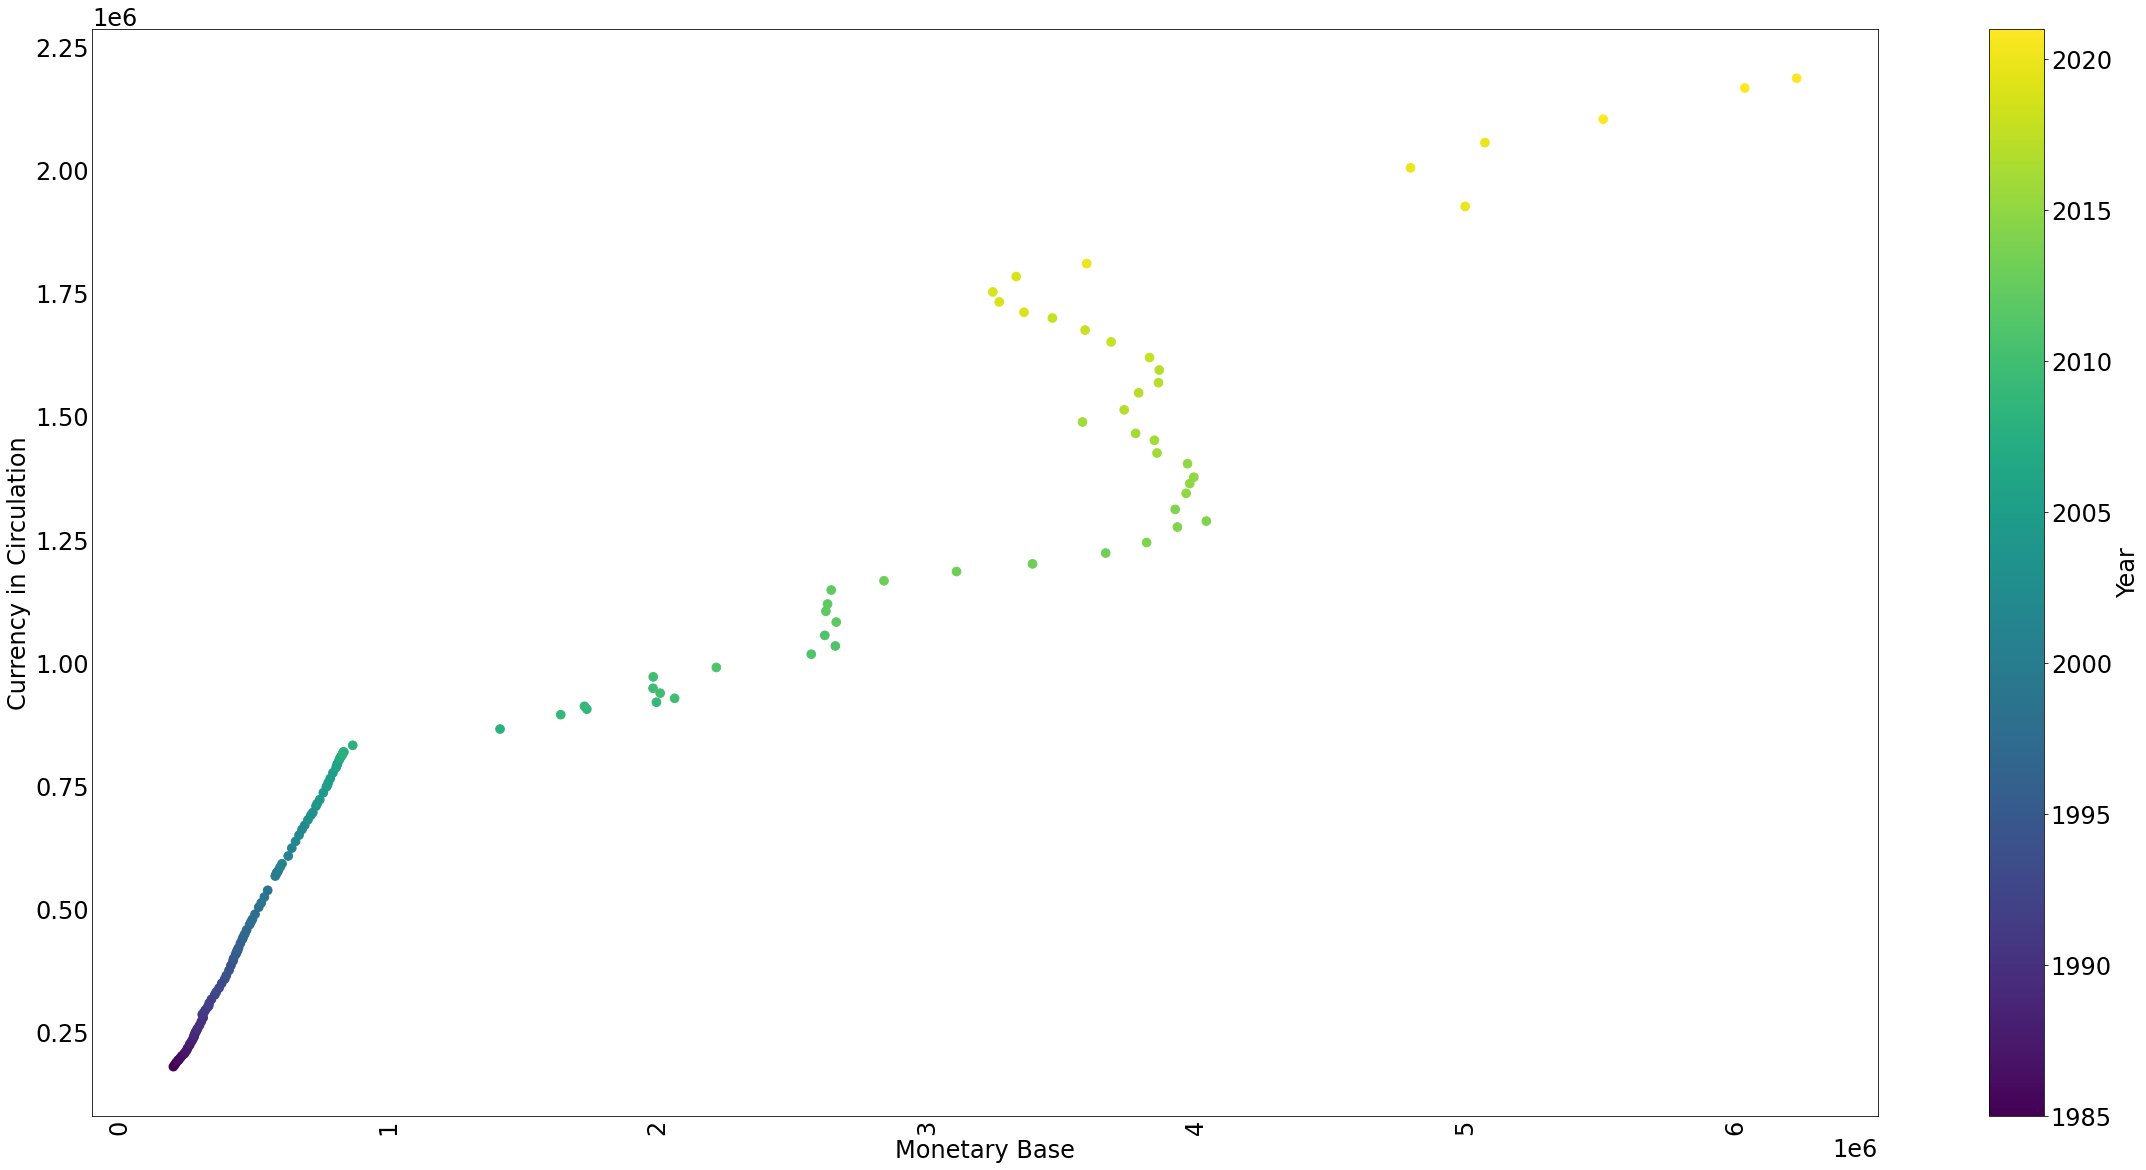

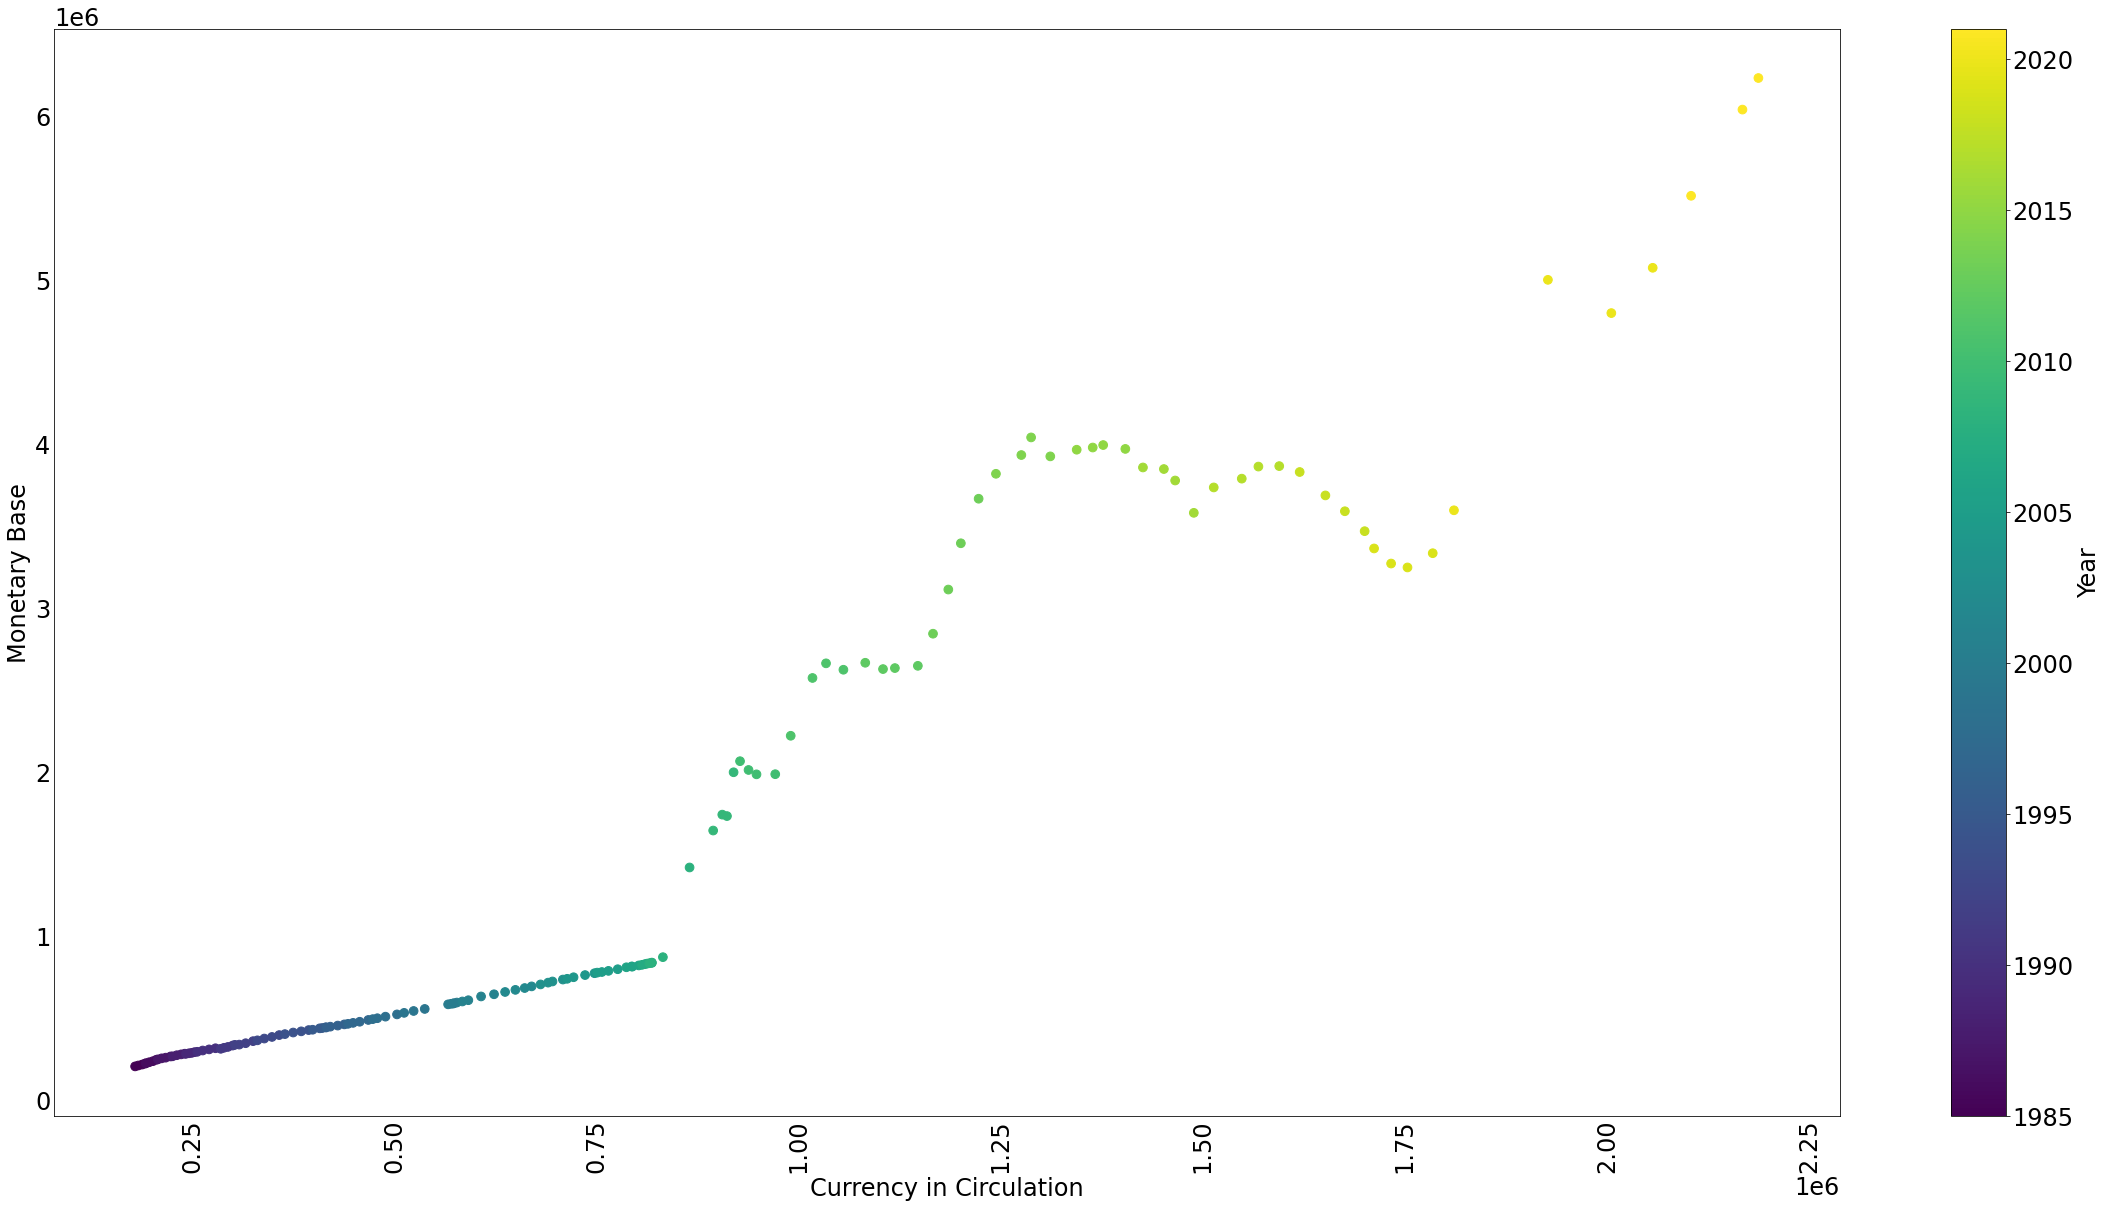

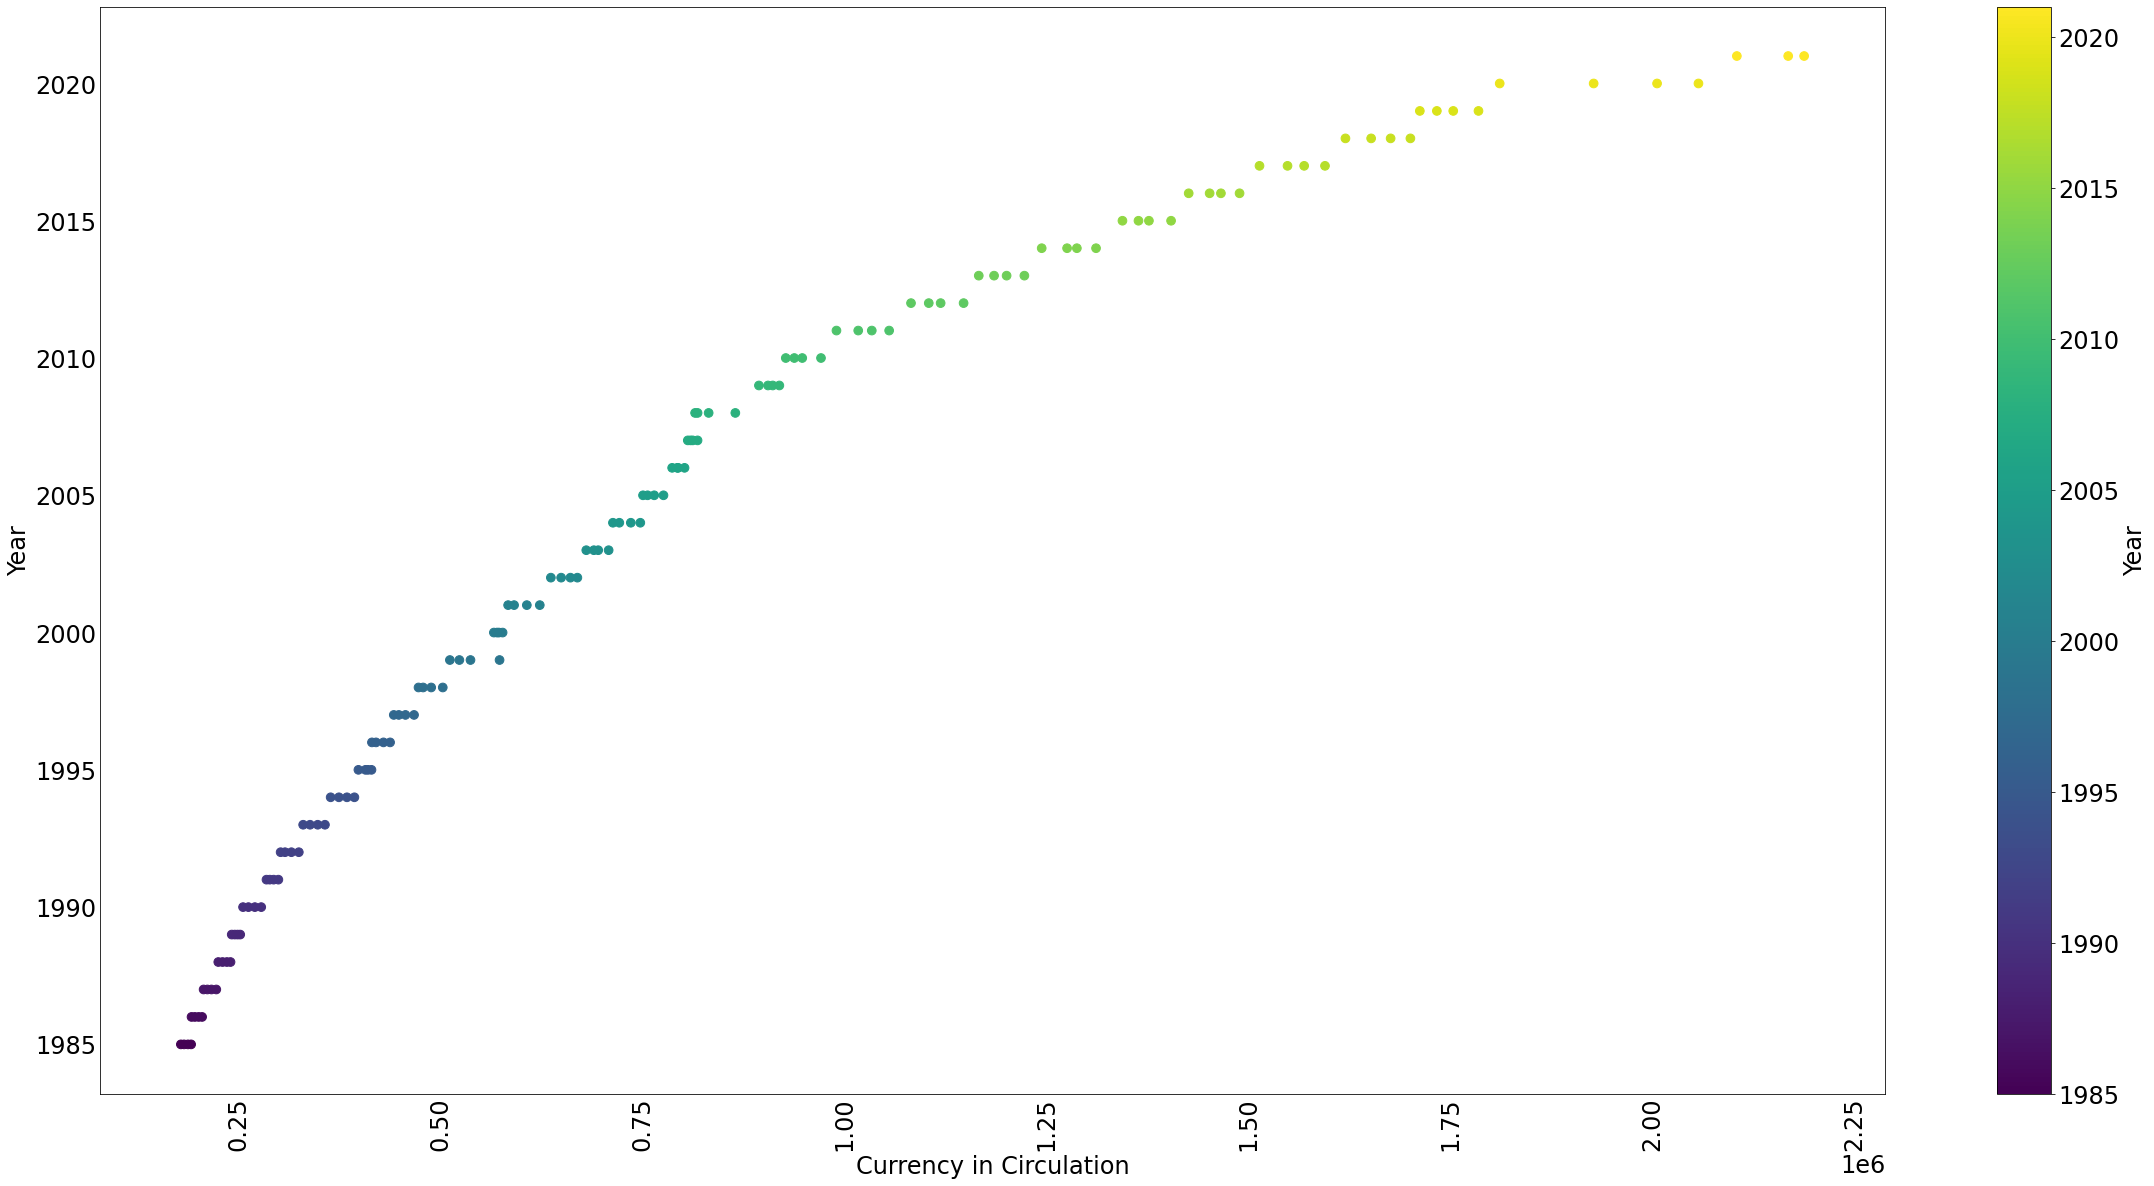

In [192]:
plot_scatter(data = dataset1, s = 75, 
             figsize = (40, 20), save_fig = False, pp = None)

/Users/isaacdubovoy/ECON_411/Homework Projects/datlib/plots.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


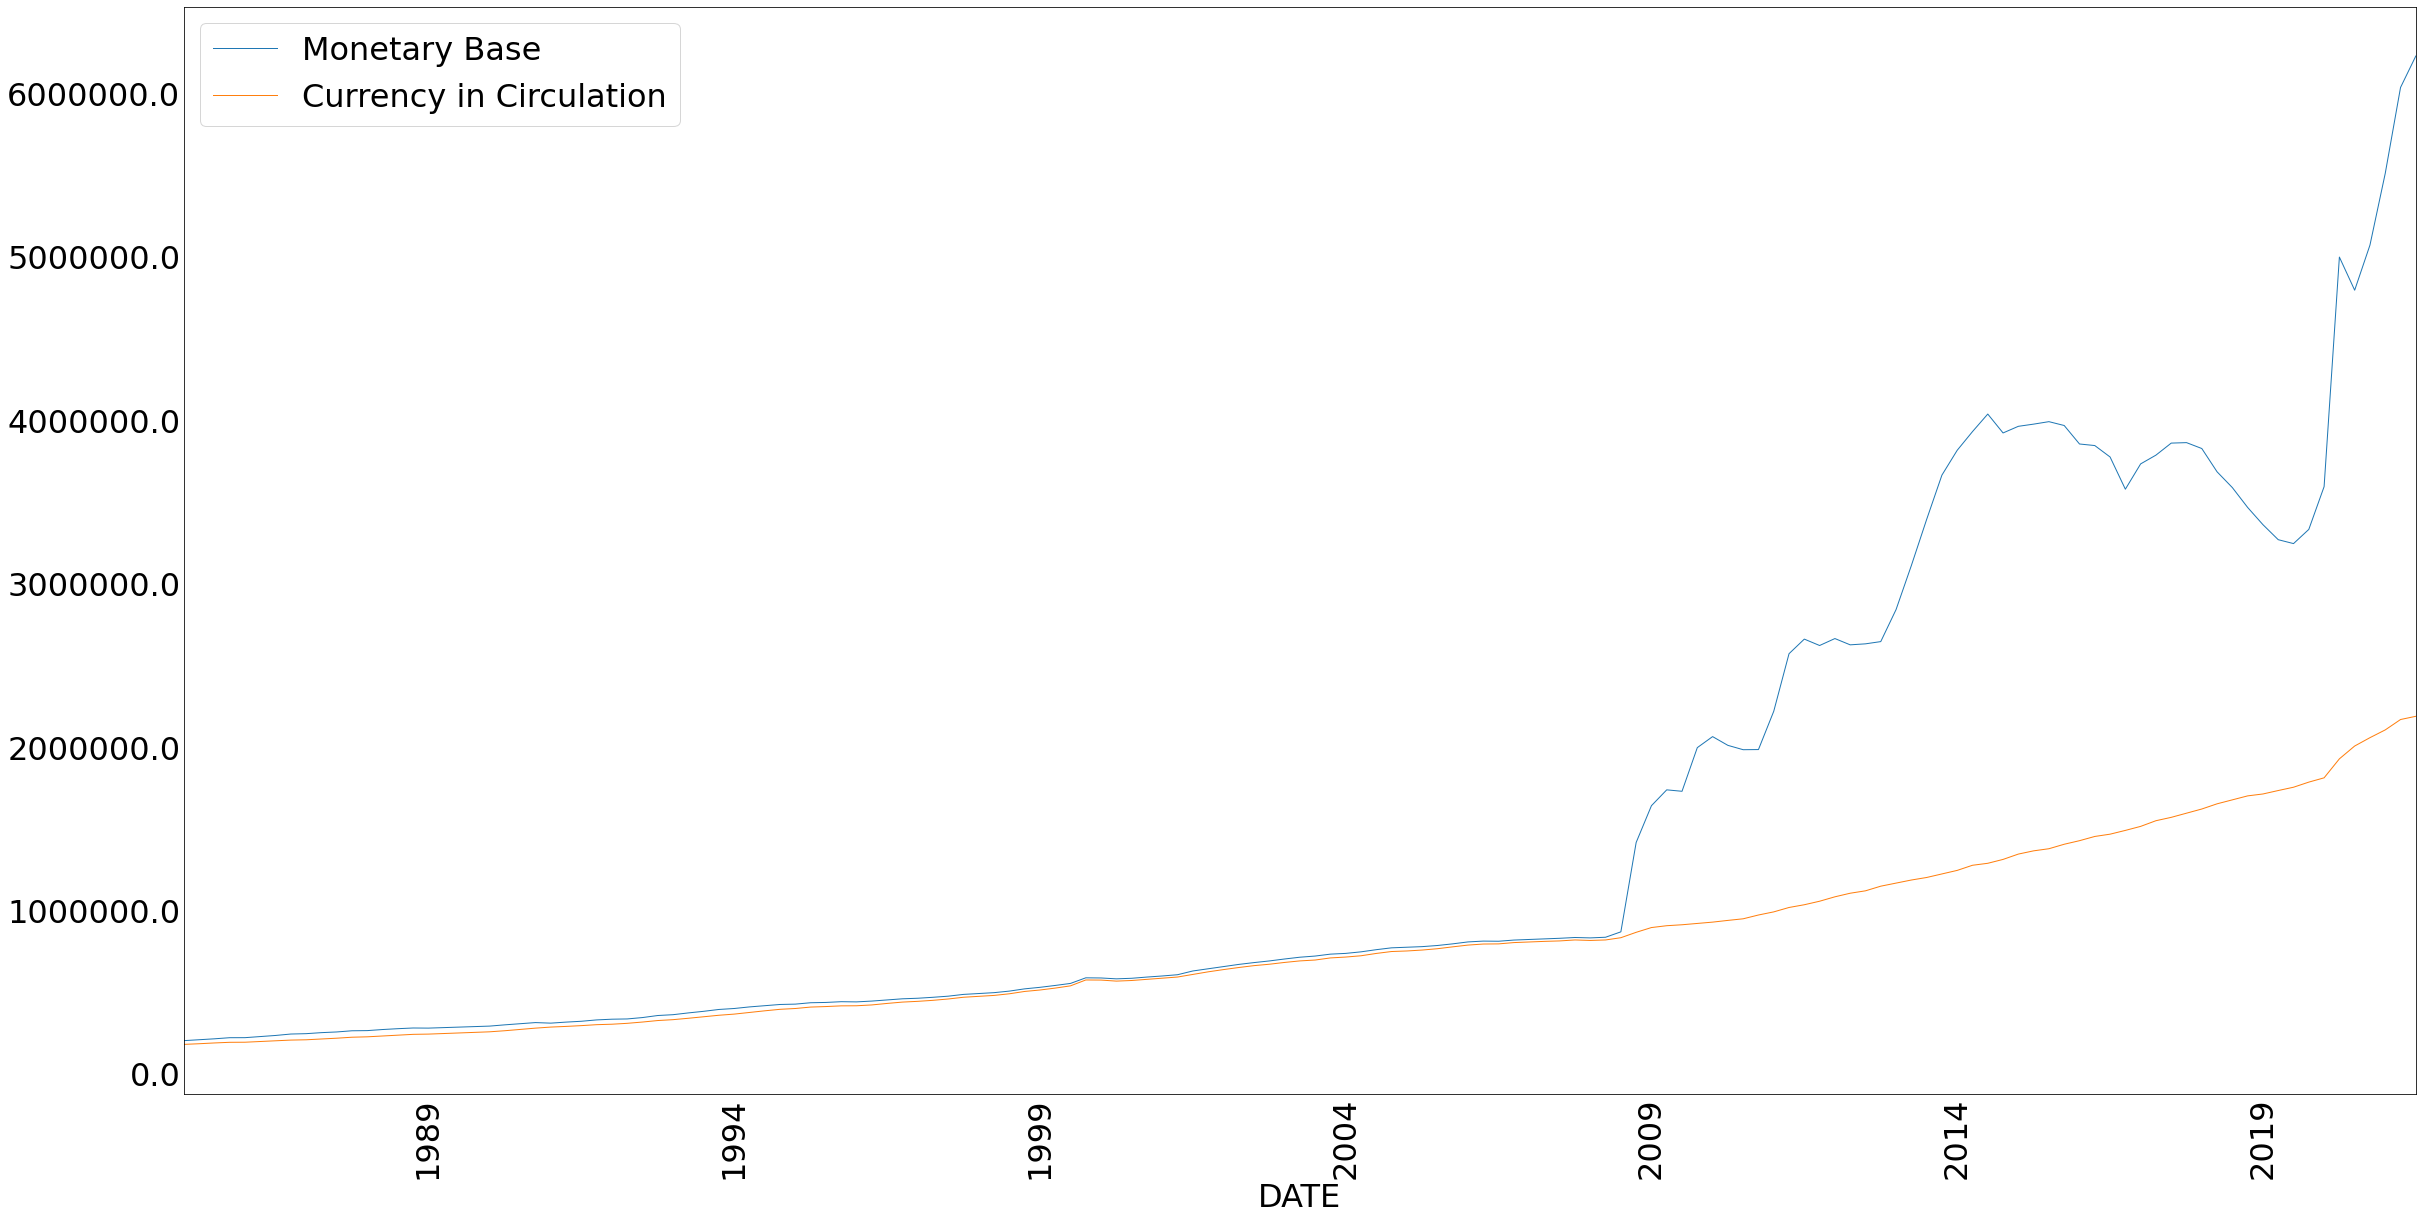

In [193]:
plt.rcParams.update({"font.size":32})
plot_lines(df = dataset1, linewidth = 1, figsize = (40, 20))

The GDP is the market value of all goods and services being produced in the U.S. economy. The Real GDP is the inflation-adjusted value of the GDP. So, GDP is a part of the equation to find Real GDP. 

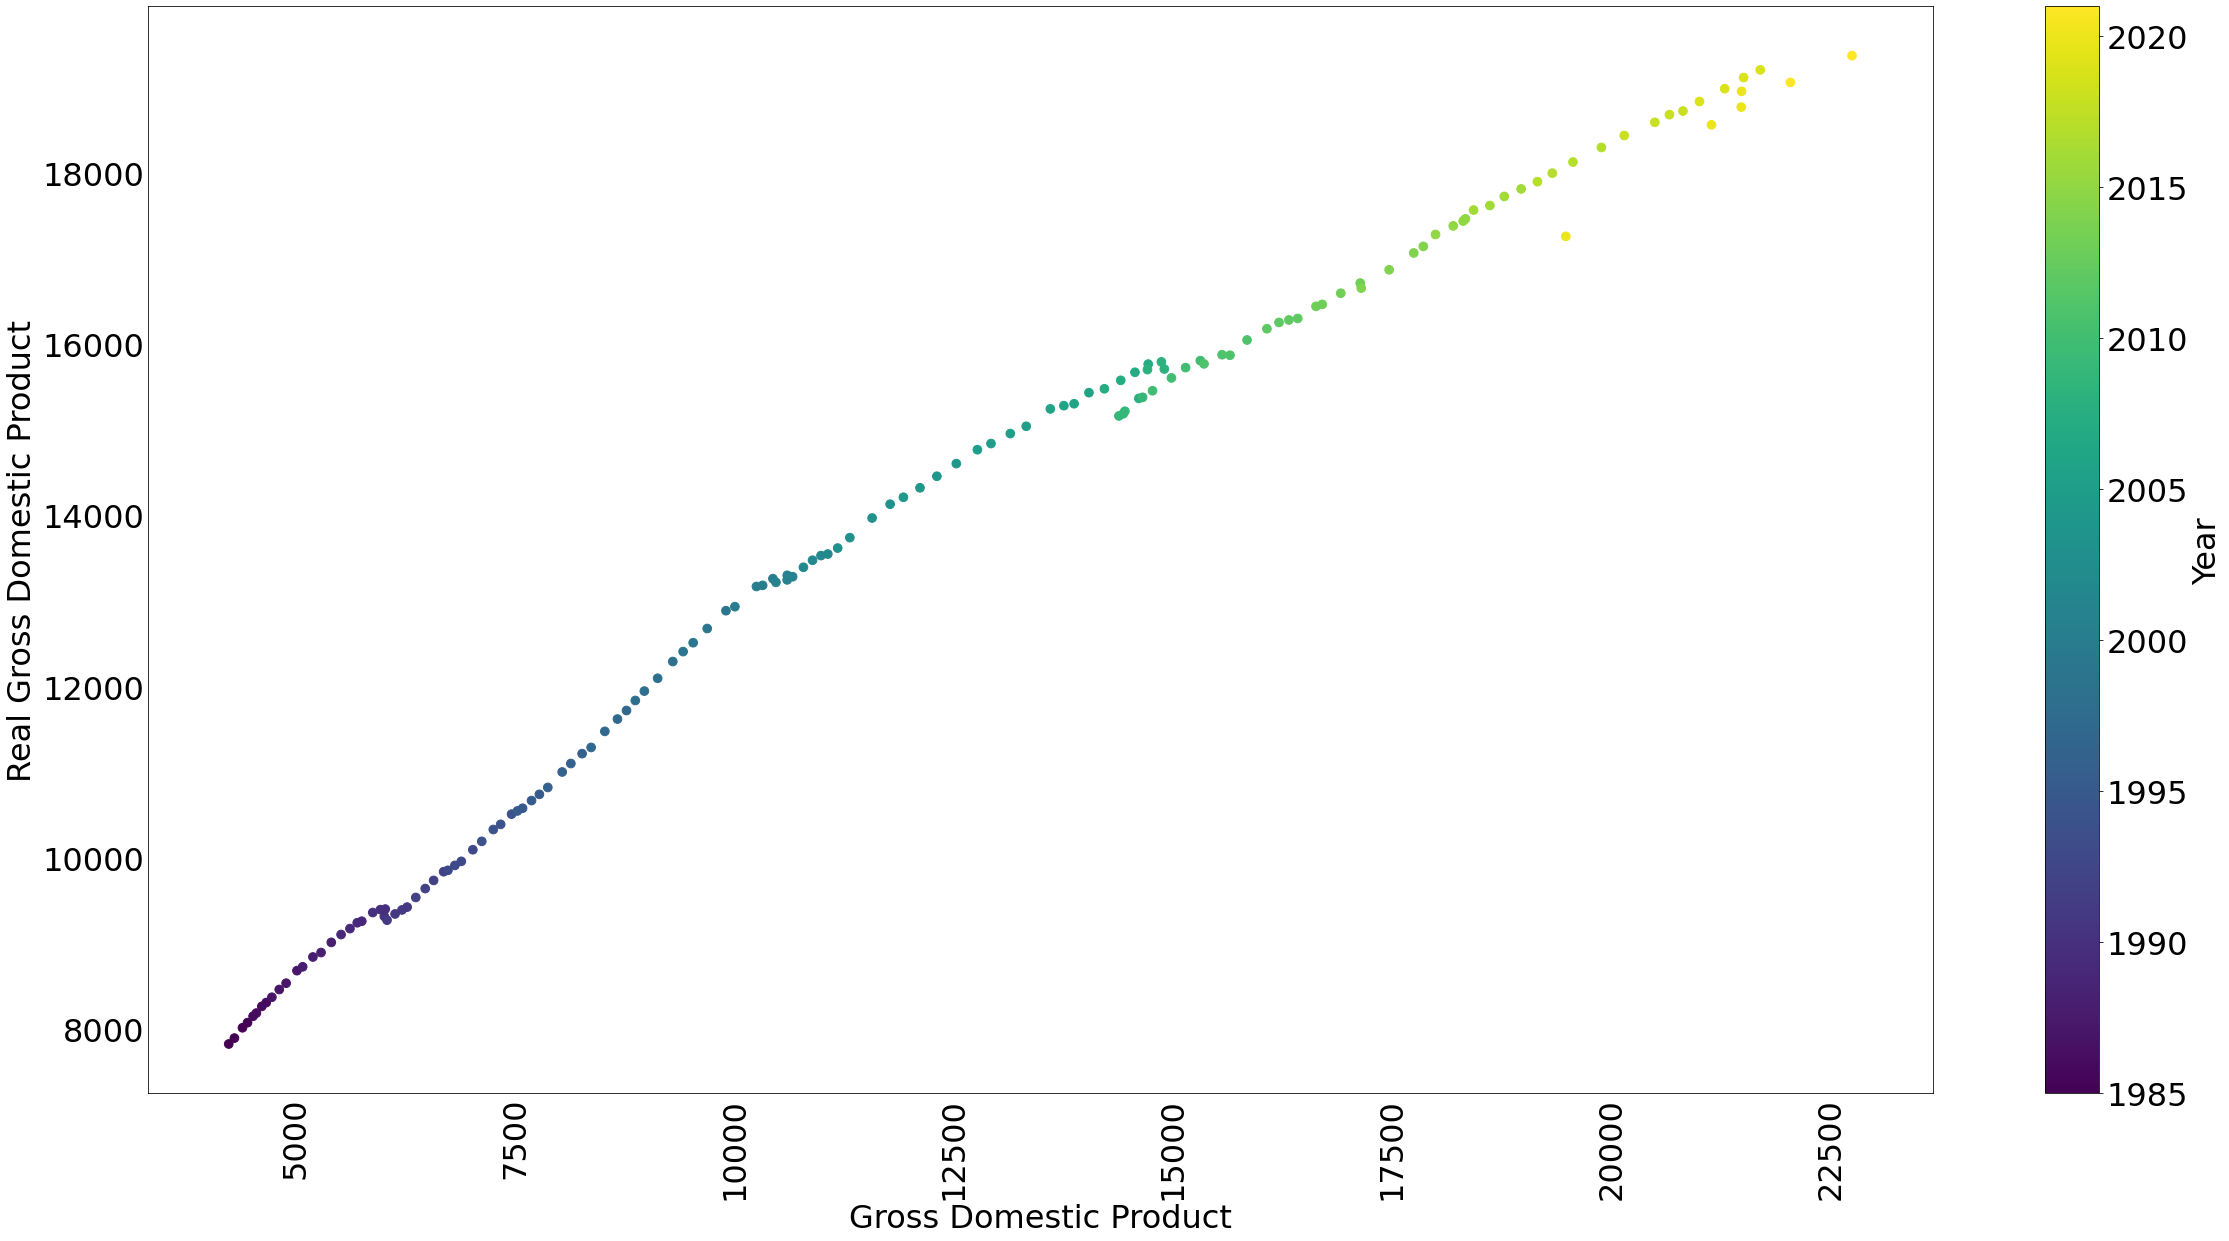

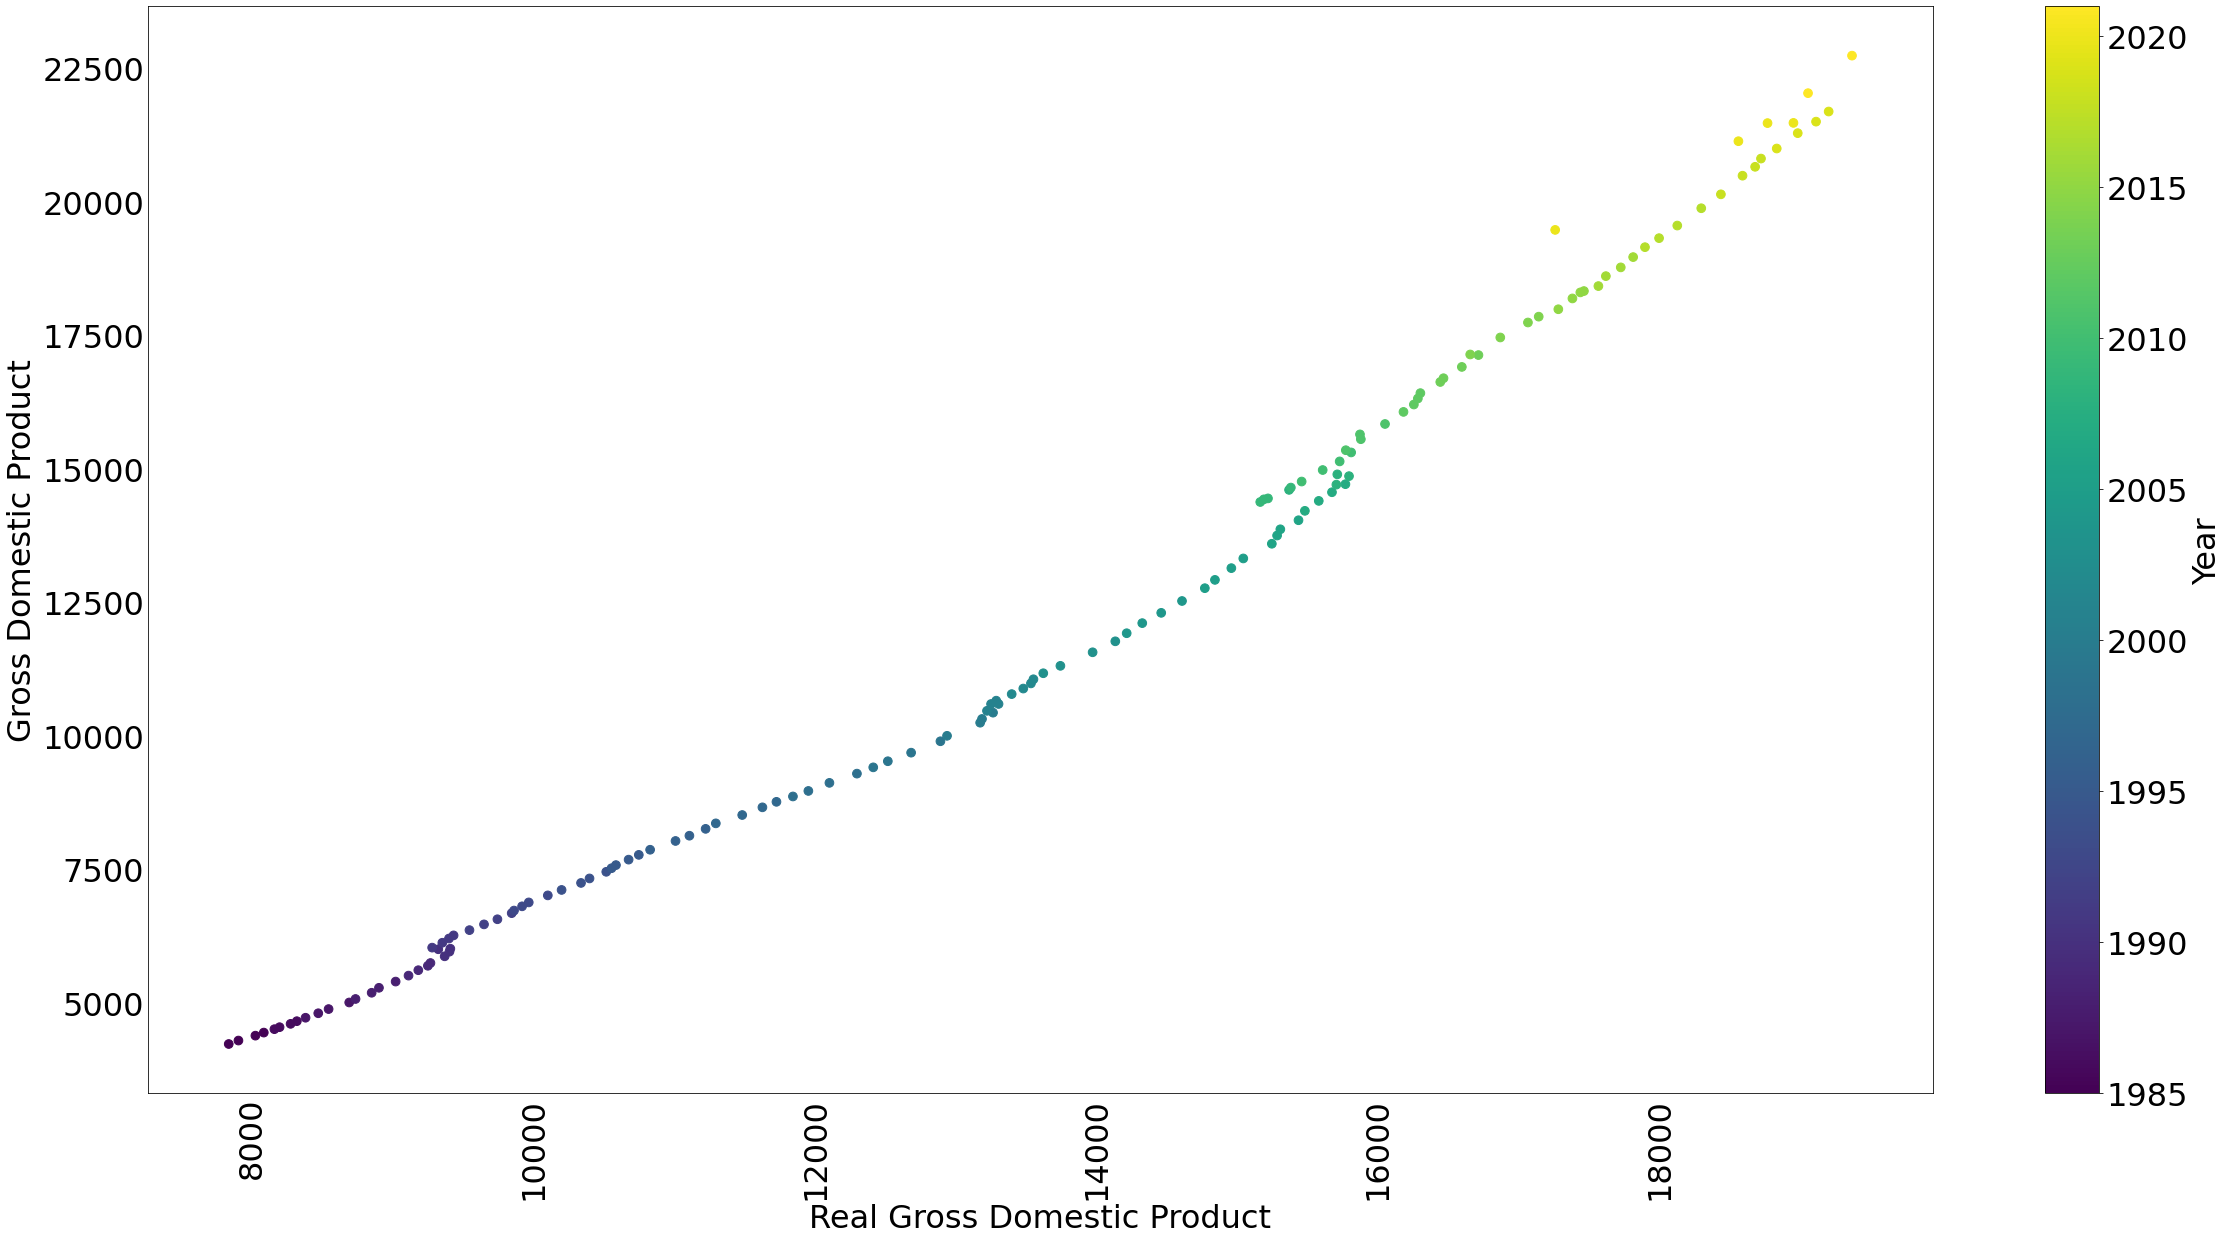

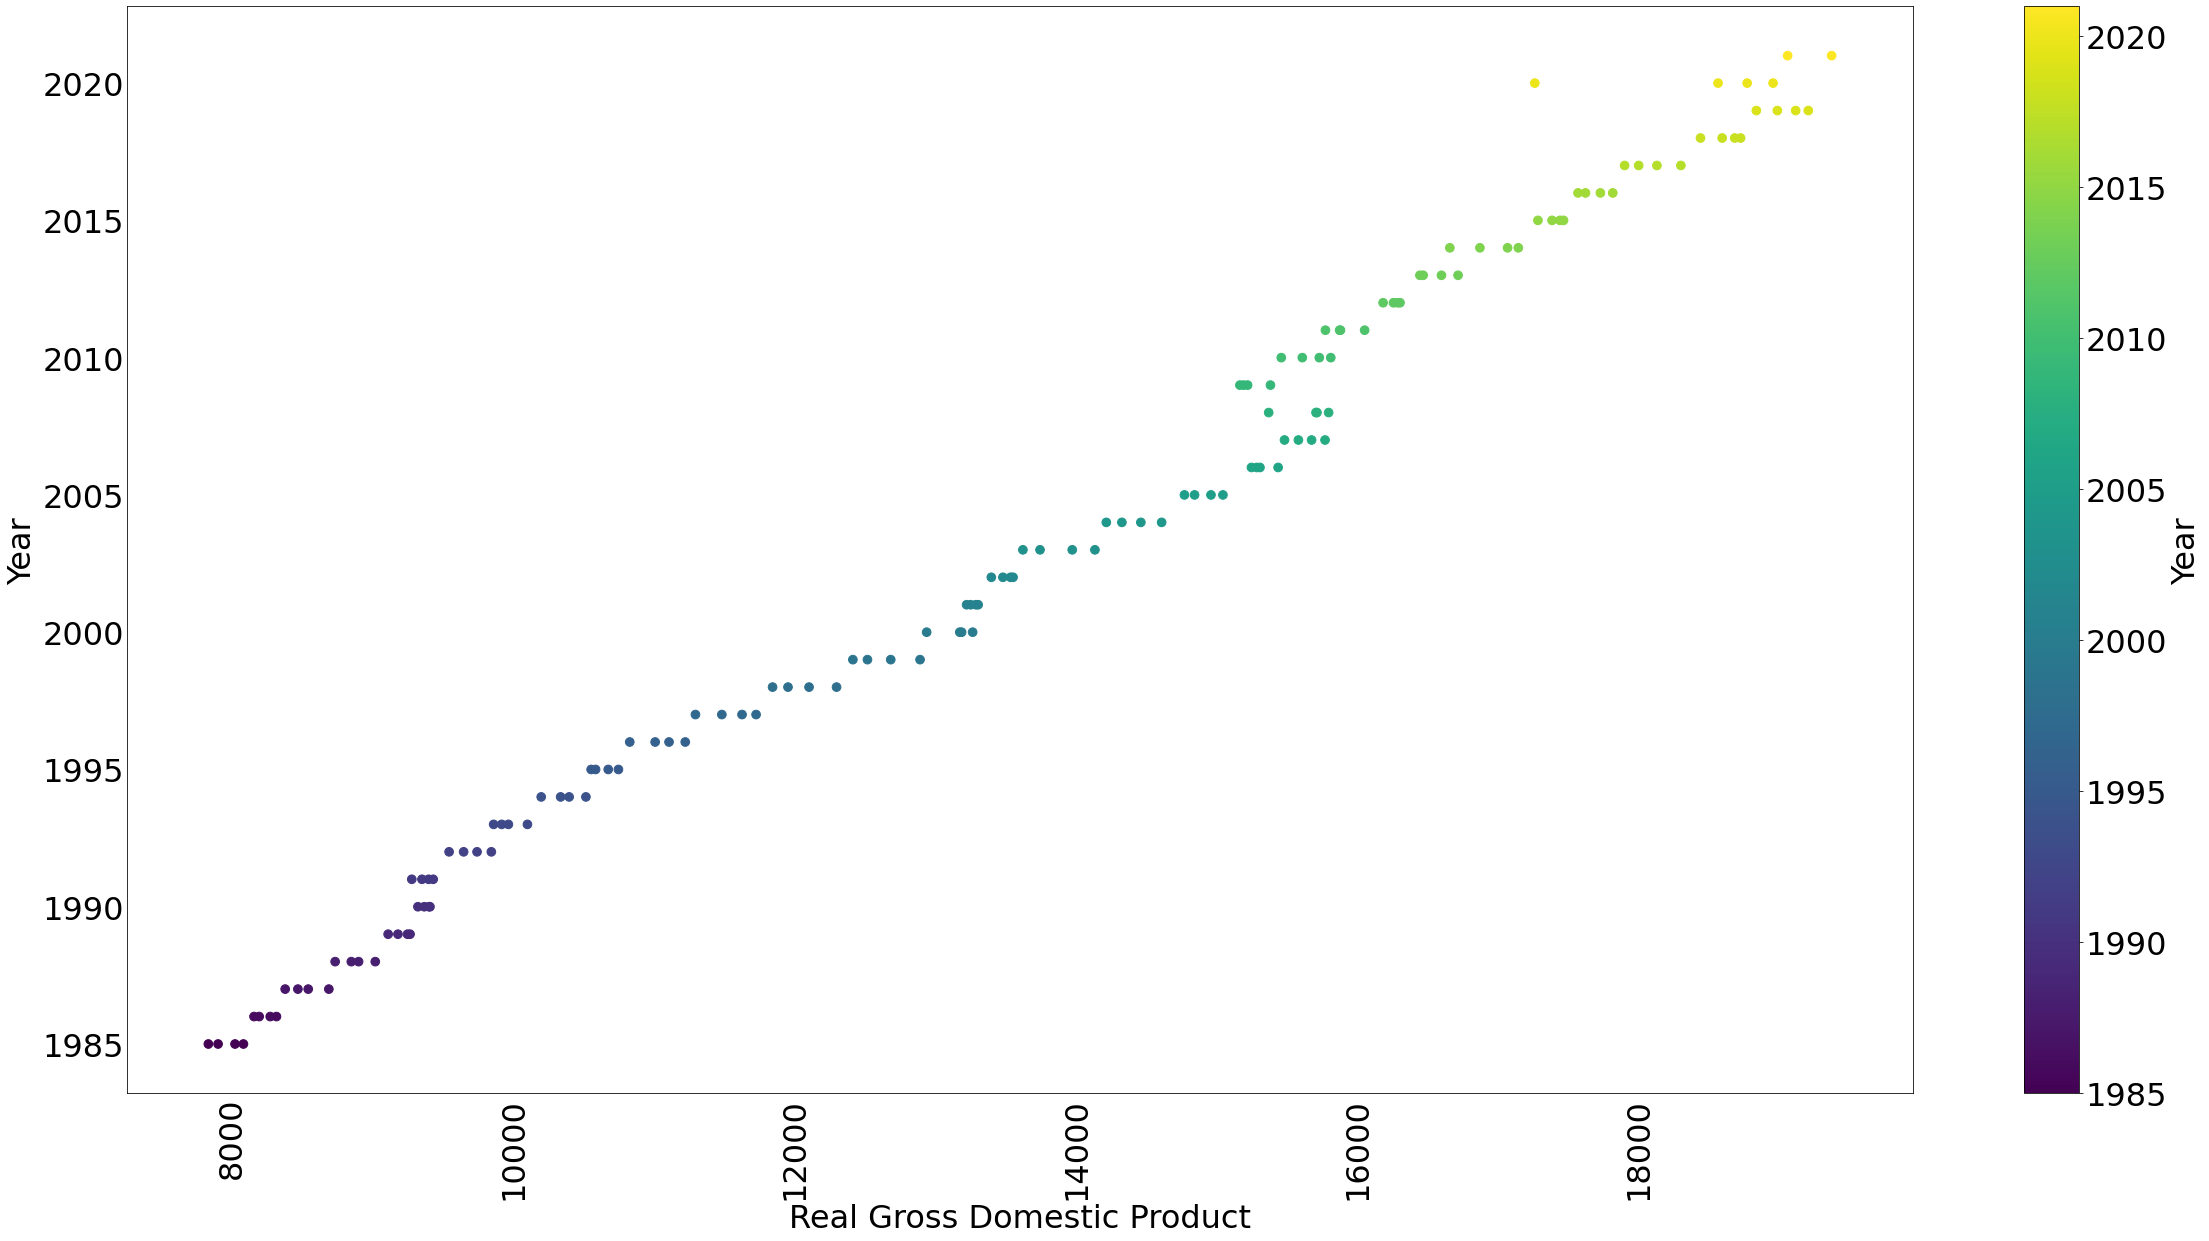

In [194]:
plot_scatter(data = dataset2, s = 75, 
             figsize = (40, 20), save_fig = False, pp = None)

/Users/isaacdubovoy/ECON_411/Homework Projects/datlib/plots.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


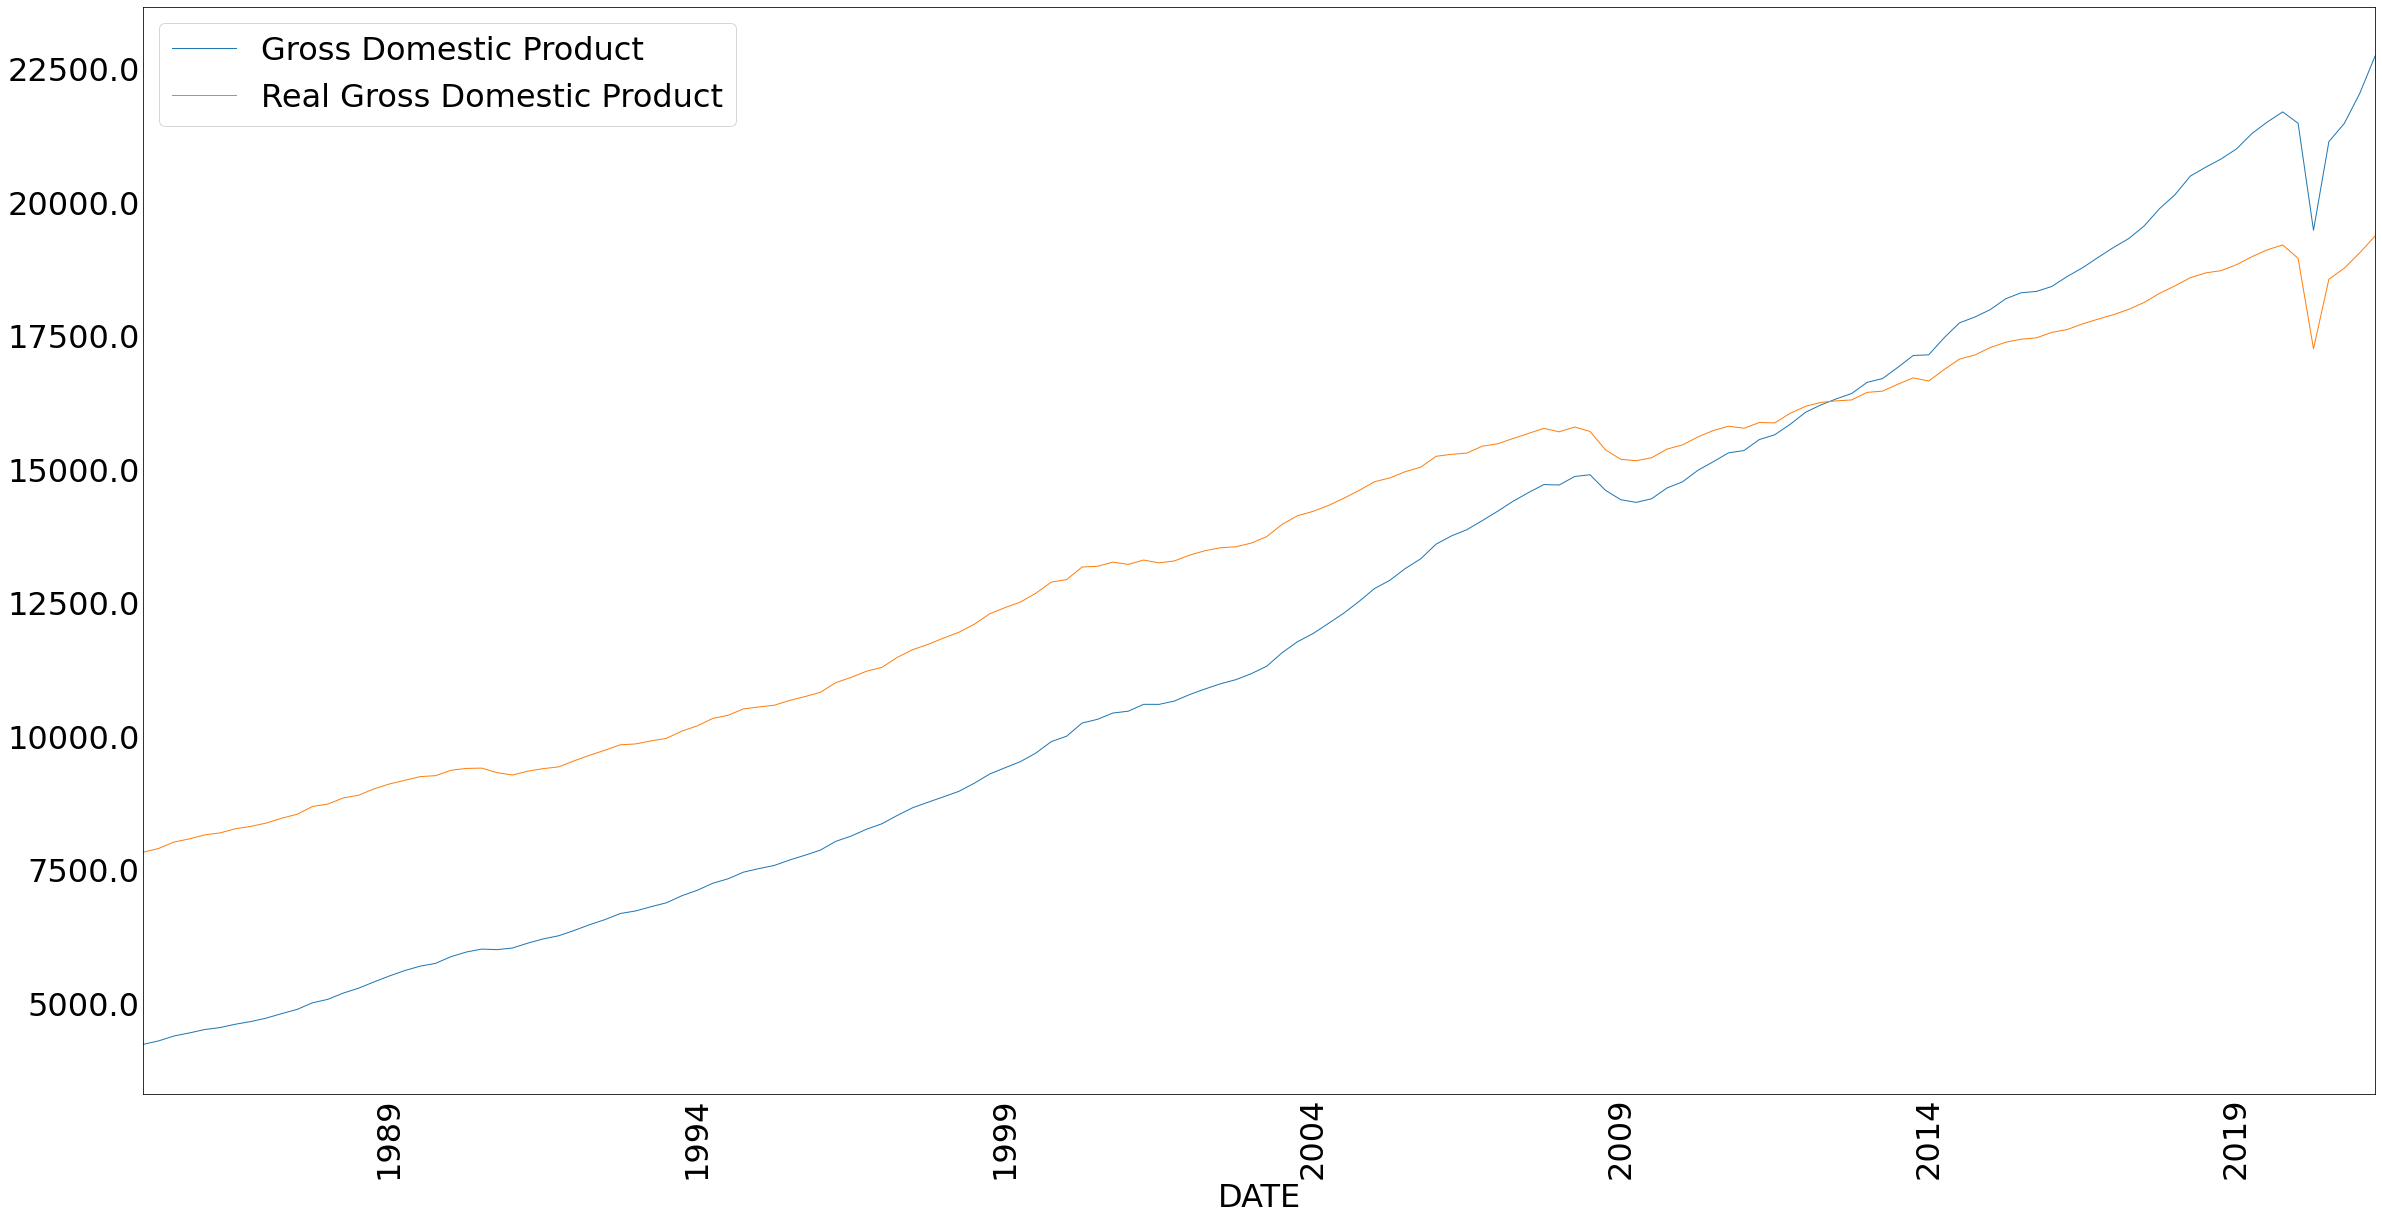

In [195]:
plot_lines(df = dataset2, linewidth = 1, figsize = (40, 20))

U.S. / Euro Foreign Exchange Rate is the exchange rate of currency between the U.S. Dollar and the Euro, while the U.S. / U.K. Foreign Exchange Rate is the exchange rate of currency between the U.S. Dollar and the Pound. Both variables compare the value of exchanging the Dollar for a foreign currency located in Europe.

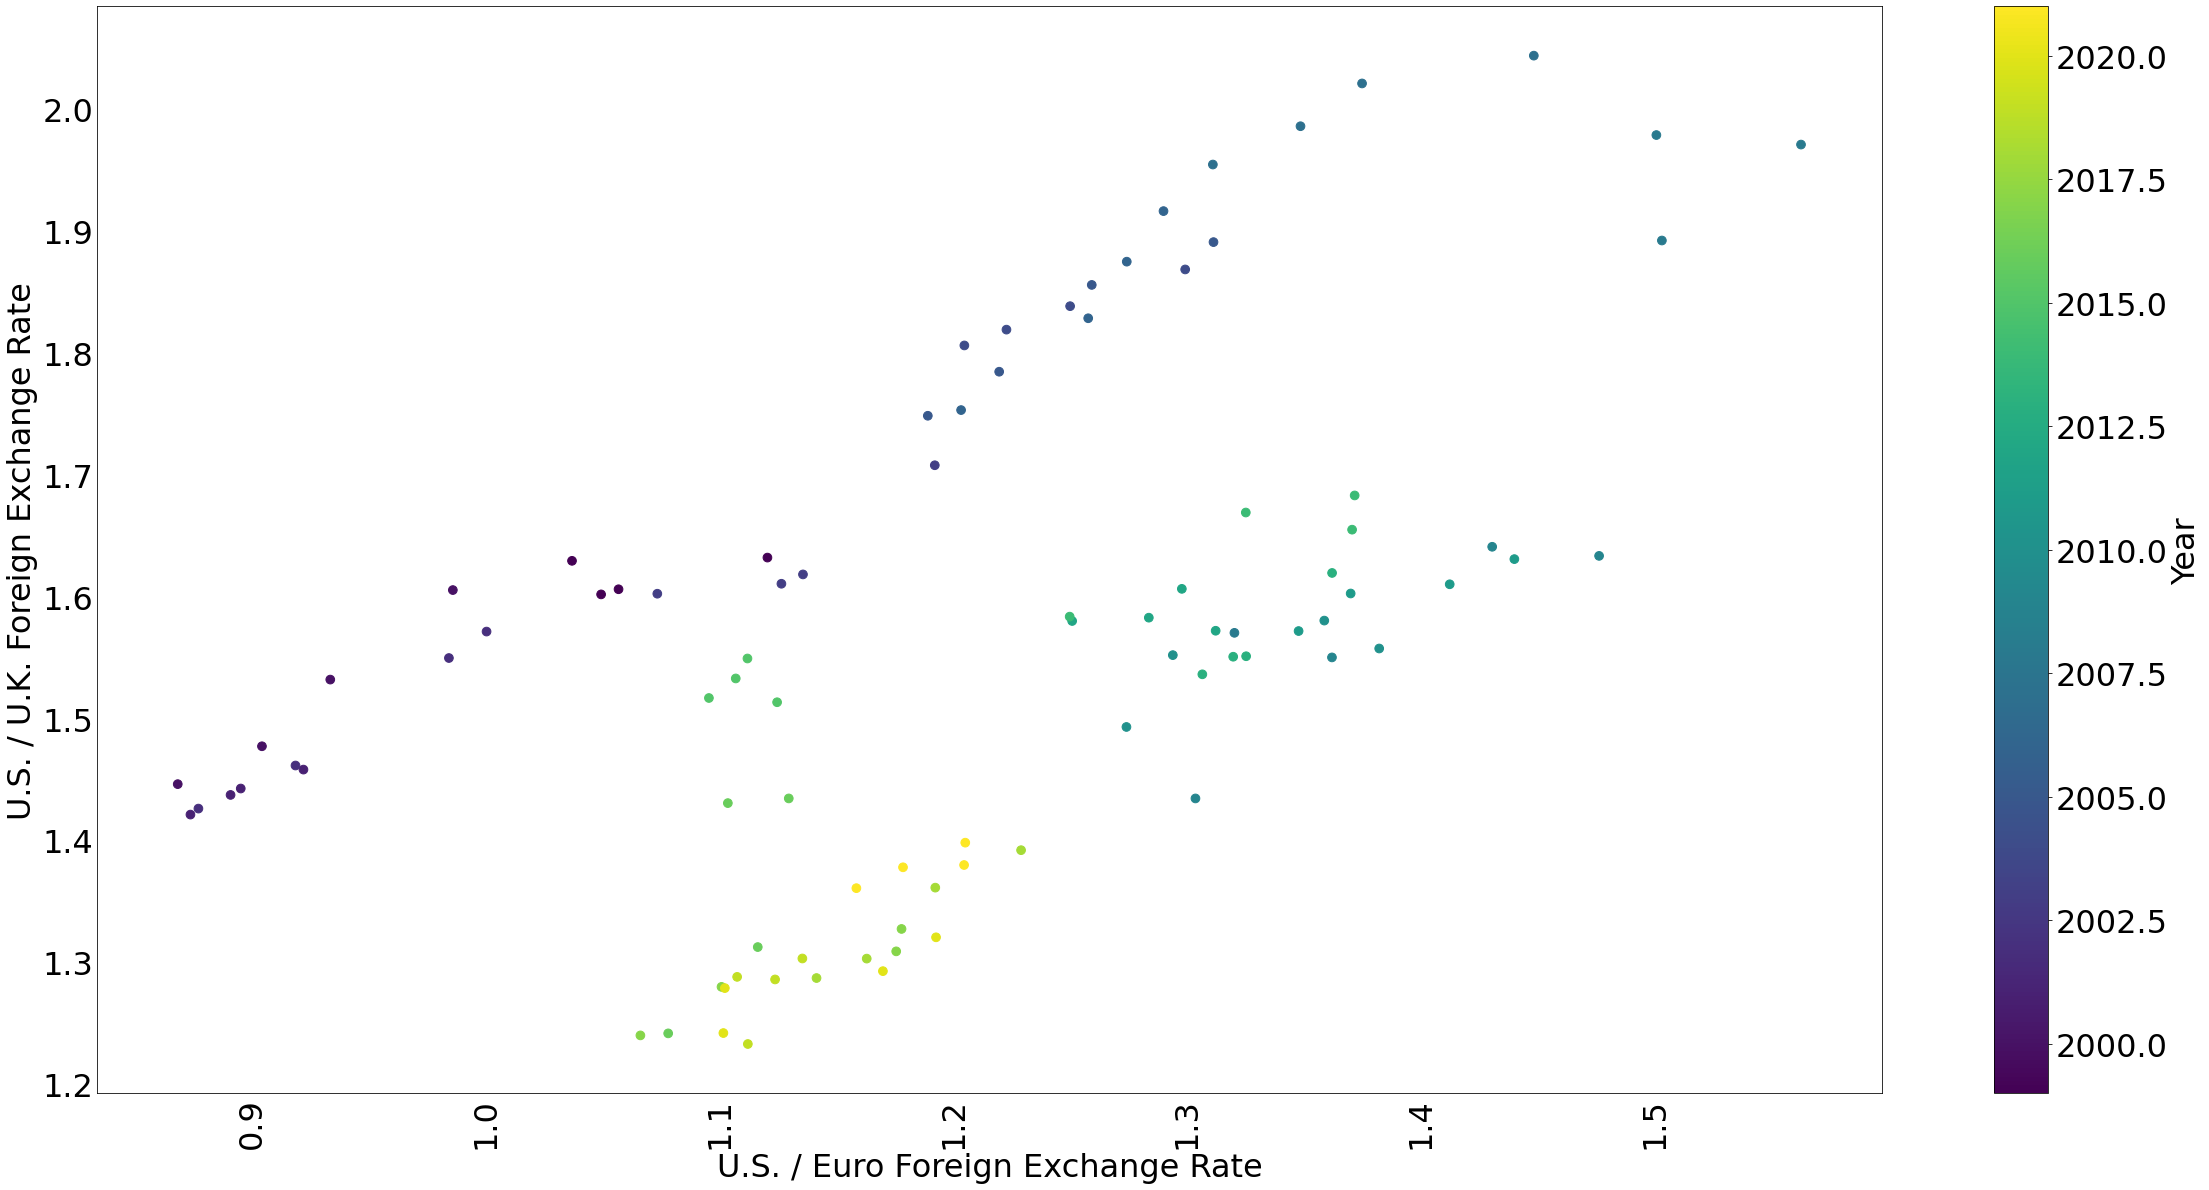

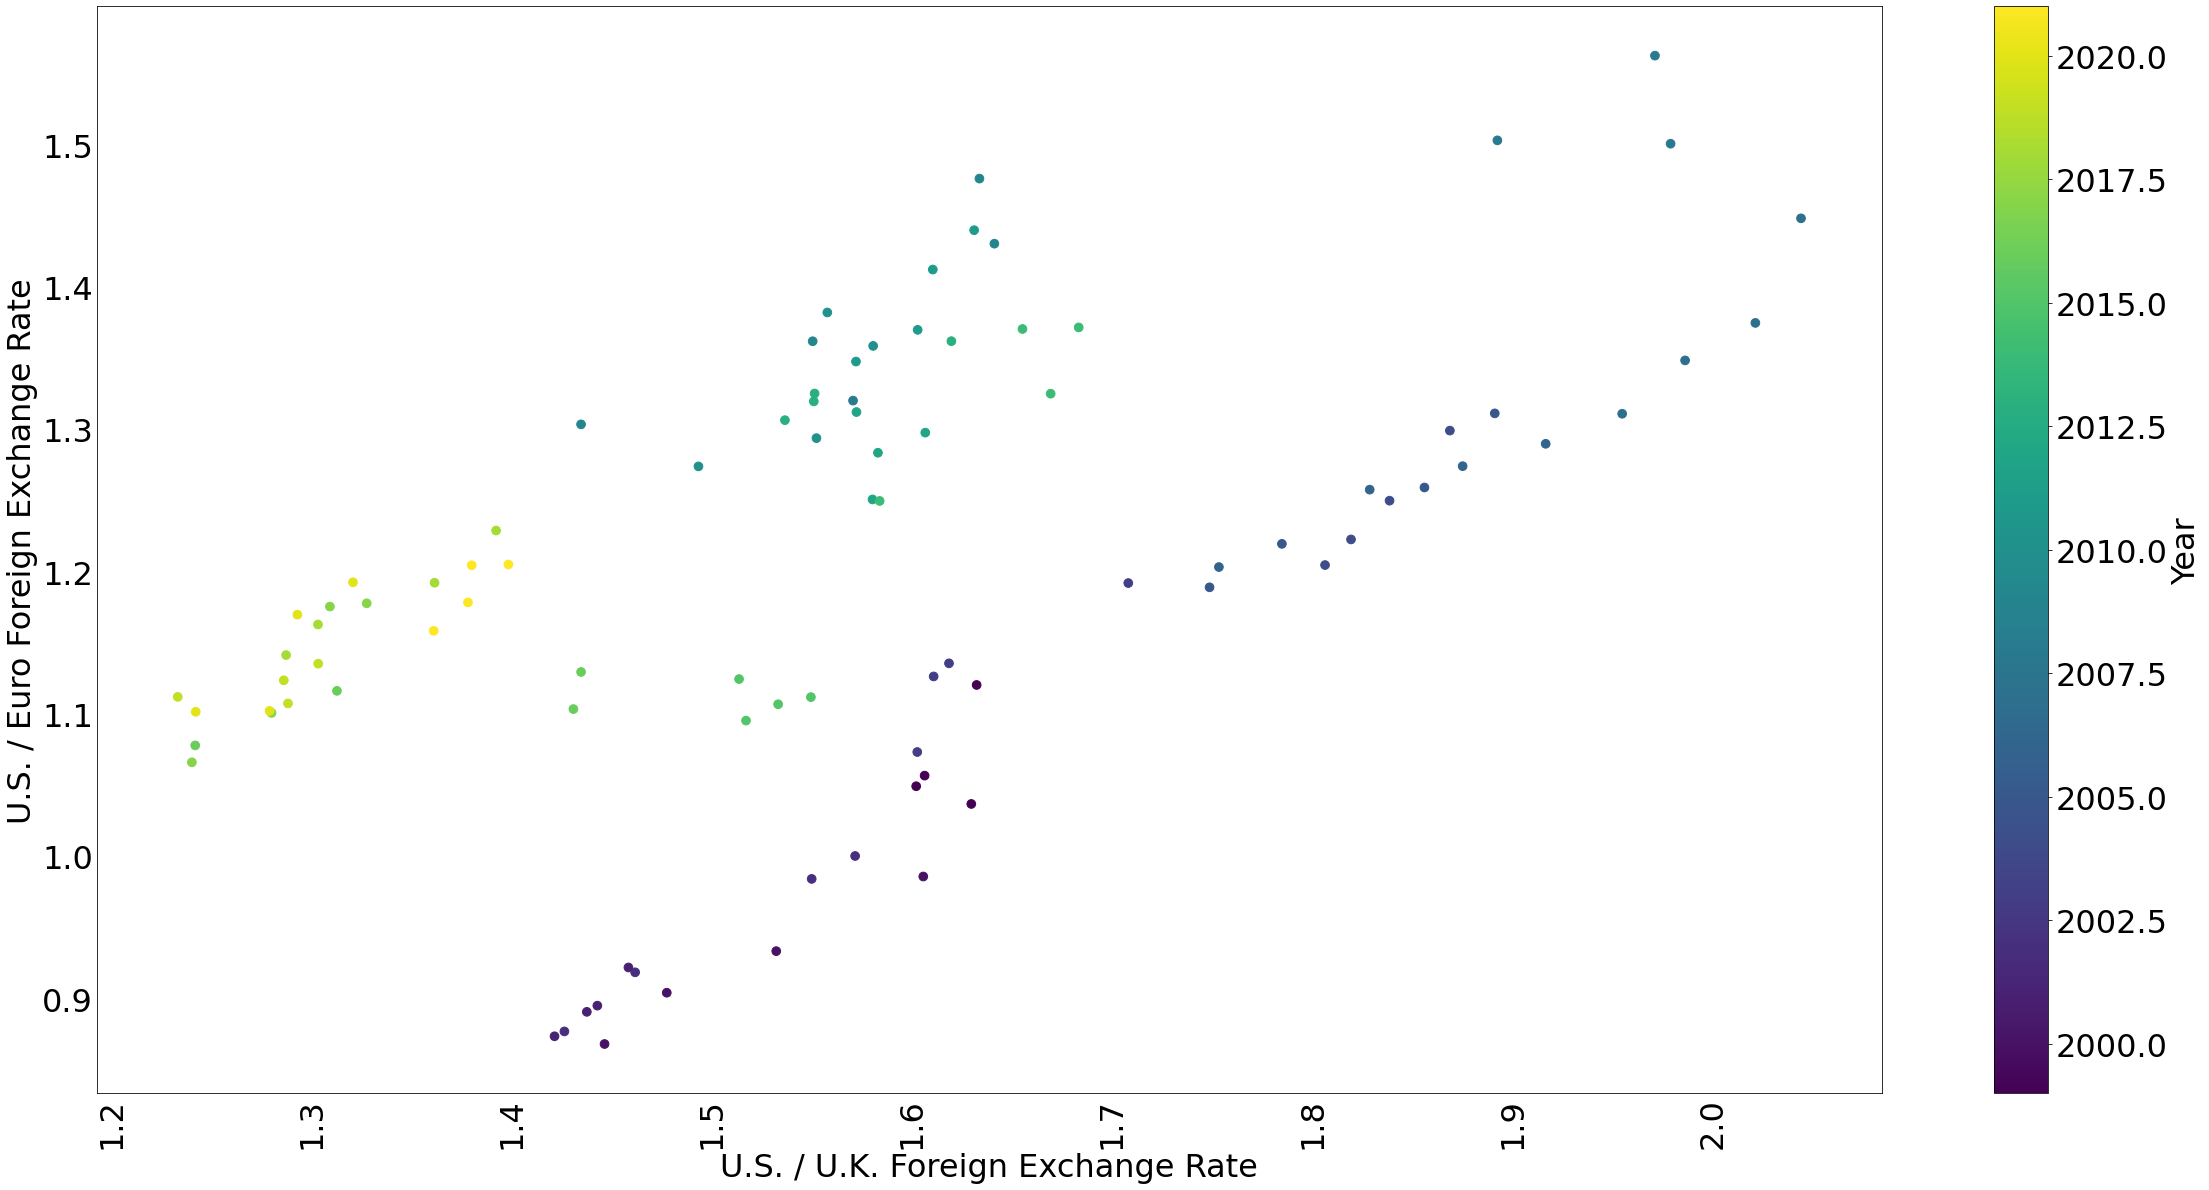

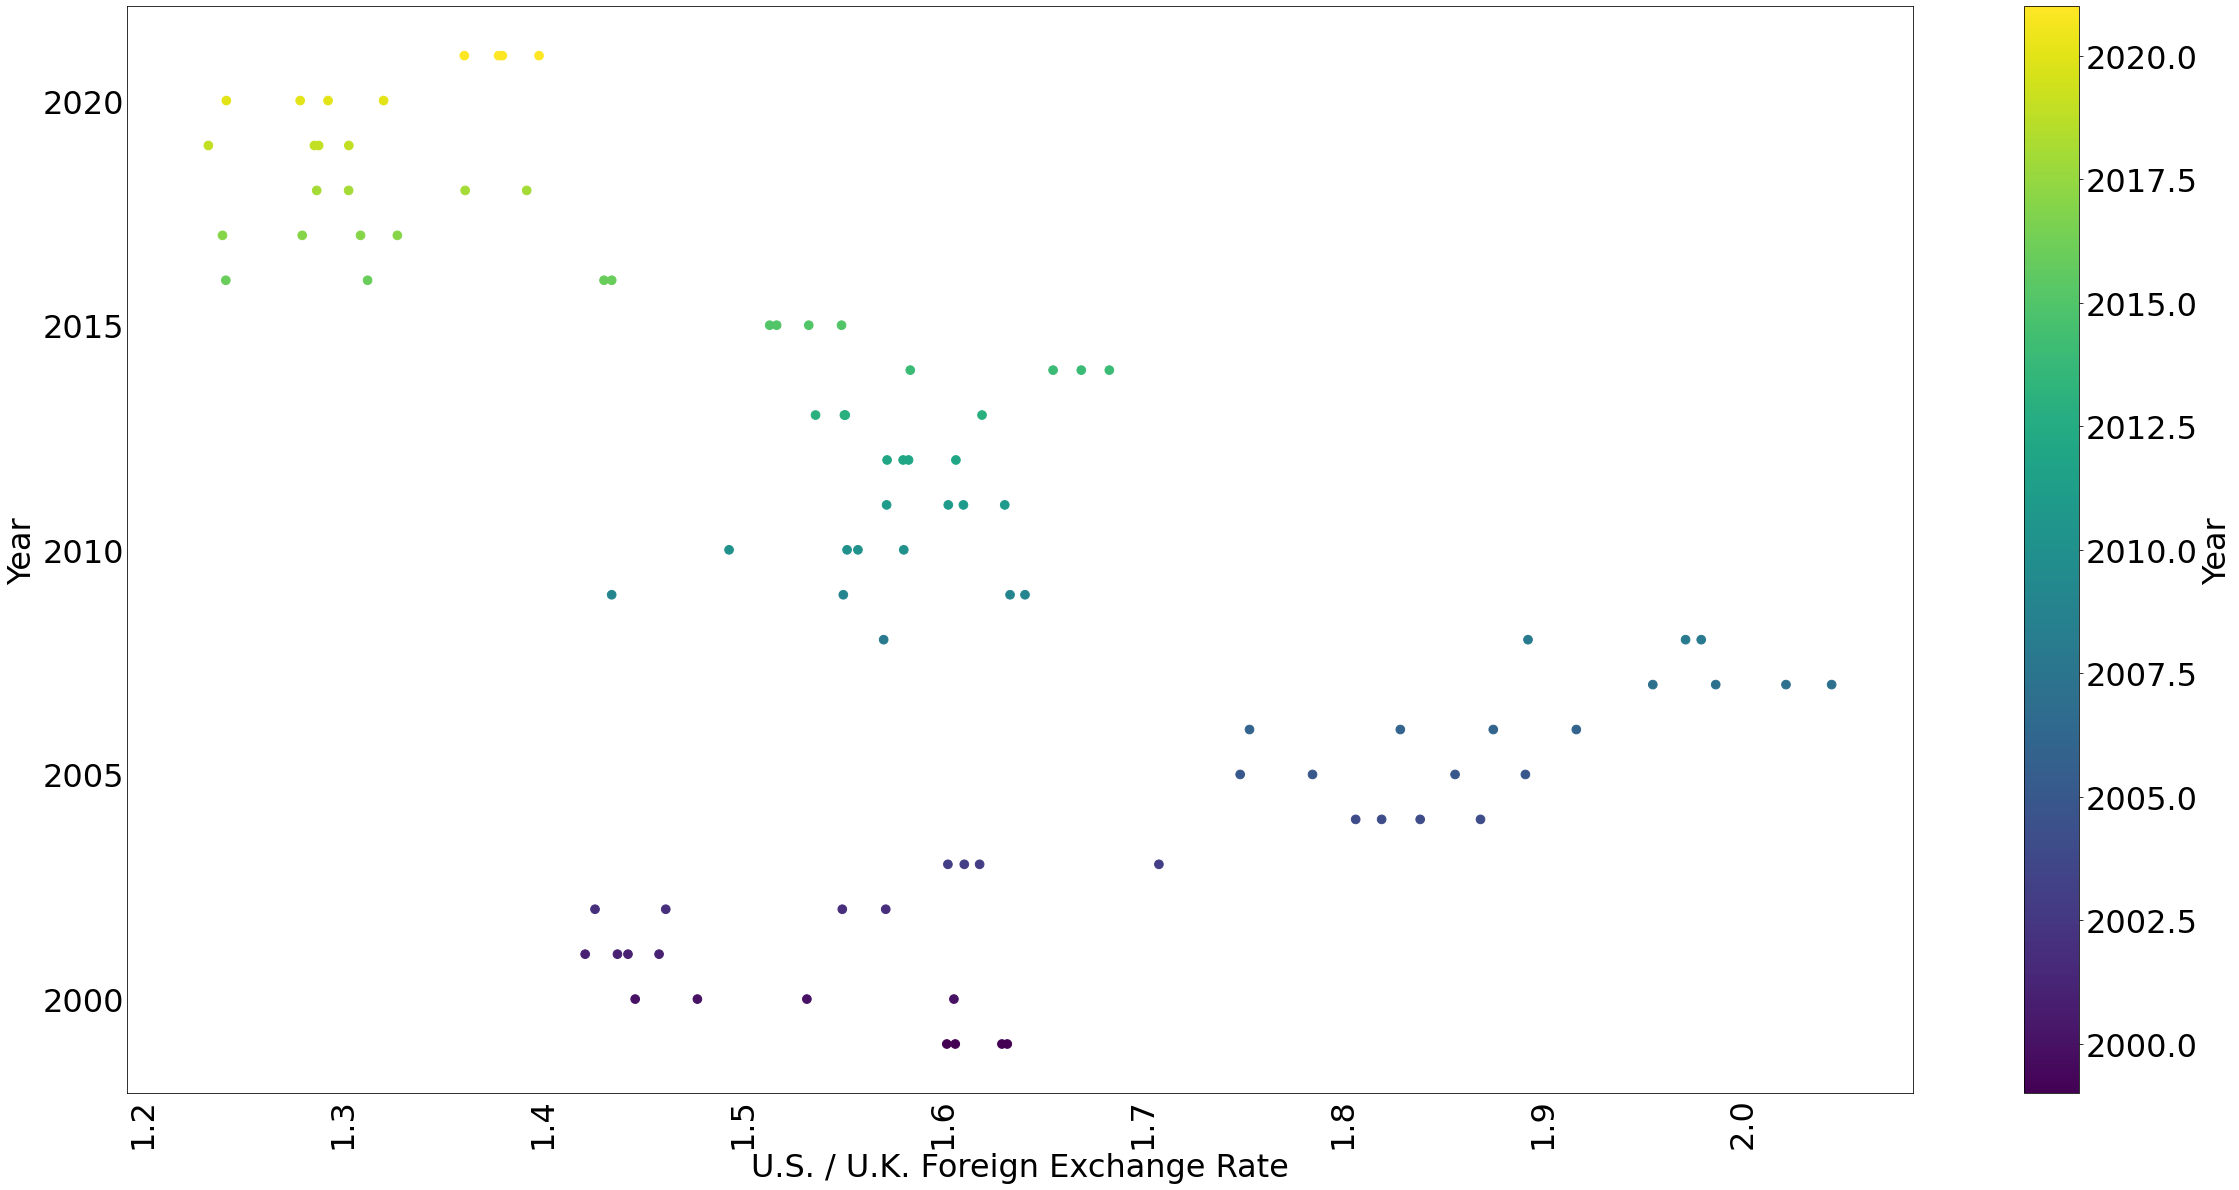

In [196]:
plot_scatter(data = dataset3, s = 75, 
             figsize = (40, 20), save_fig = False, pp = None)

/Users/isaacdubovoy/ECON_411/Homework Projects/datlib/plots.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


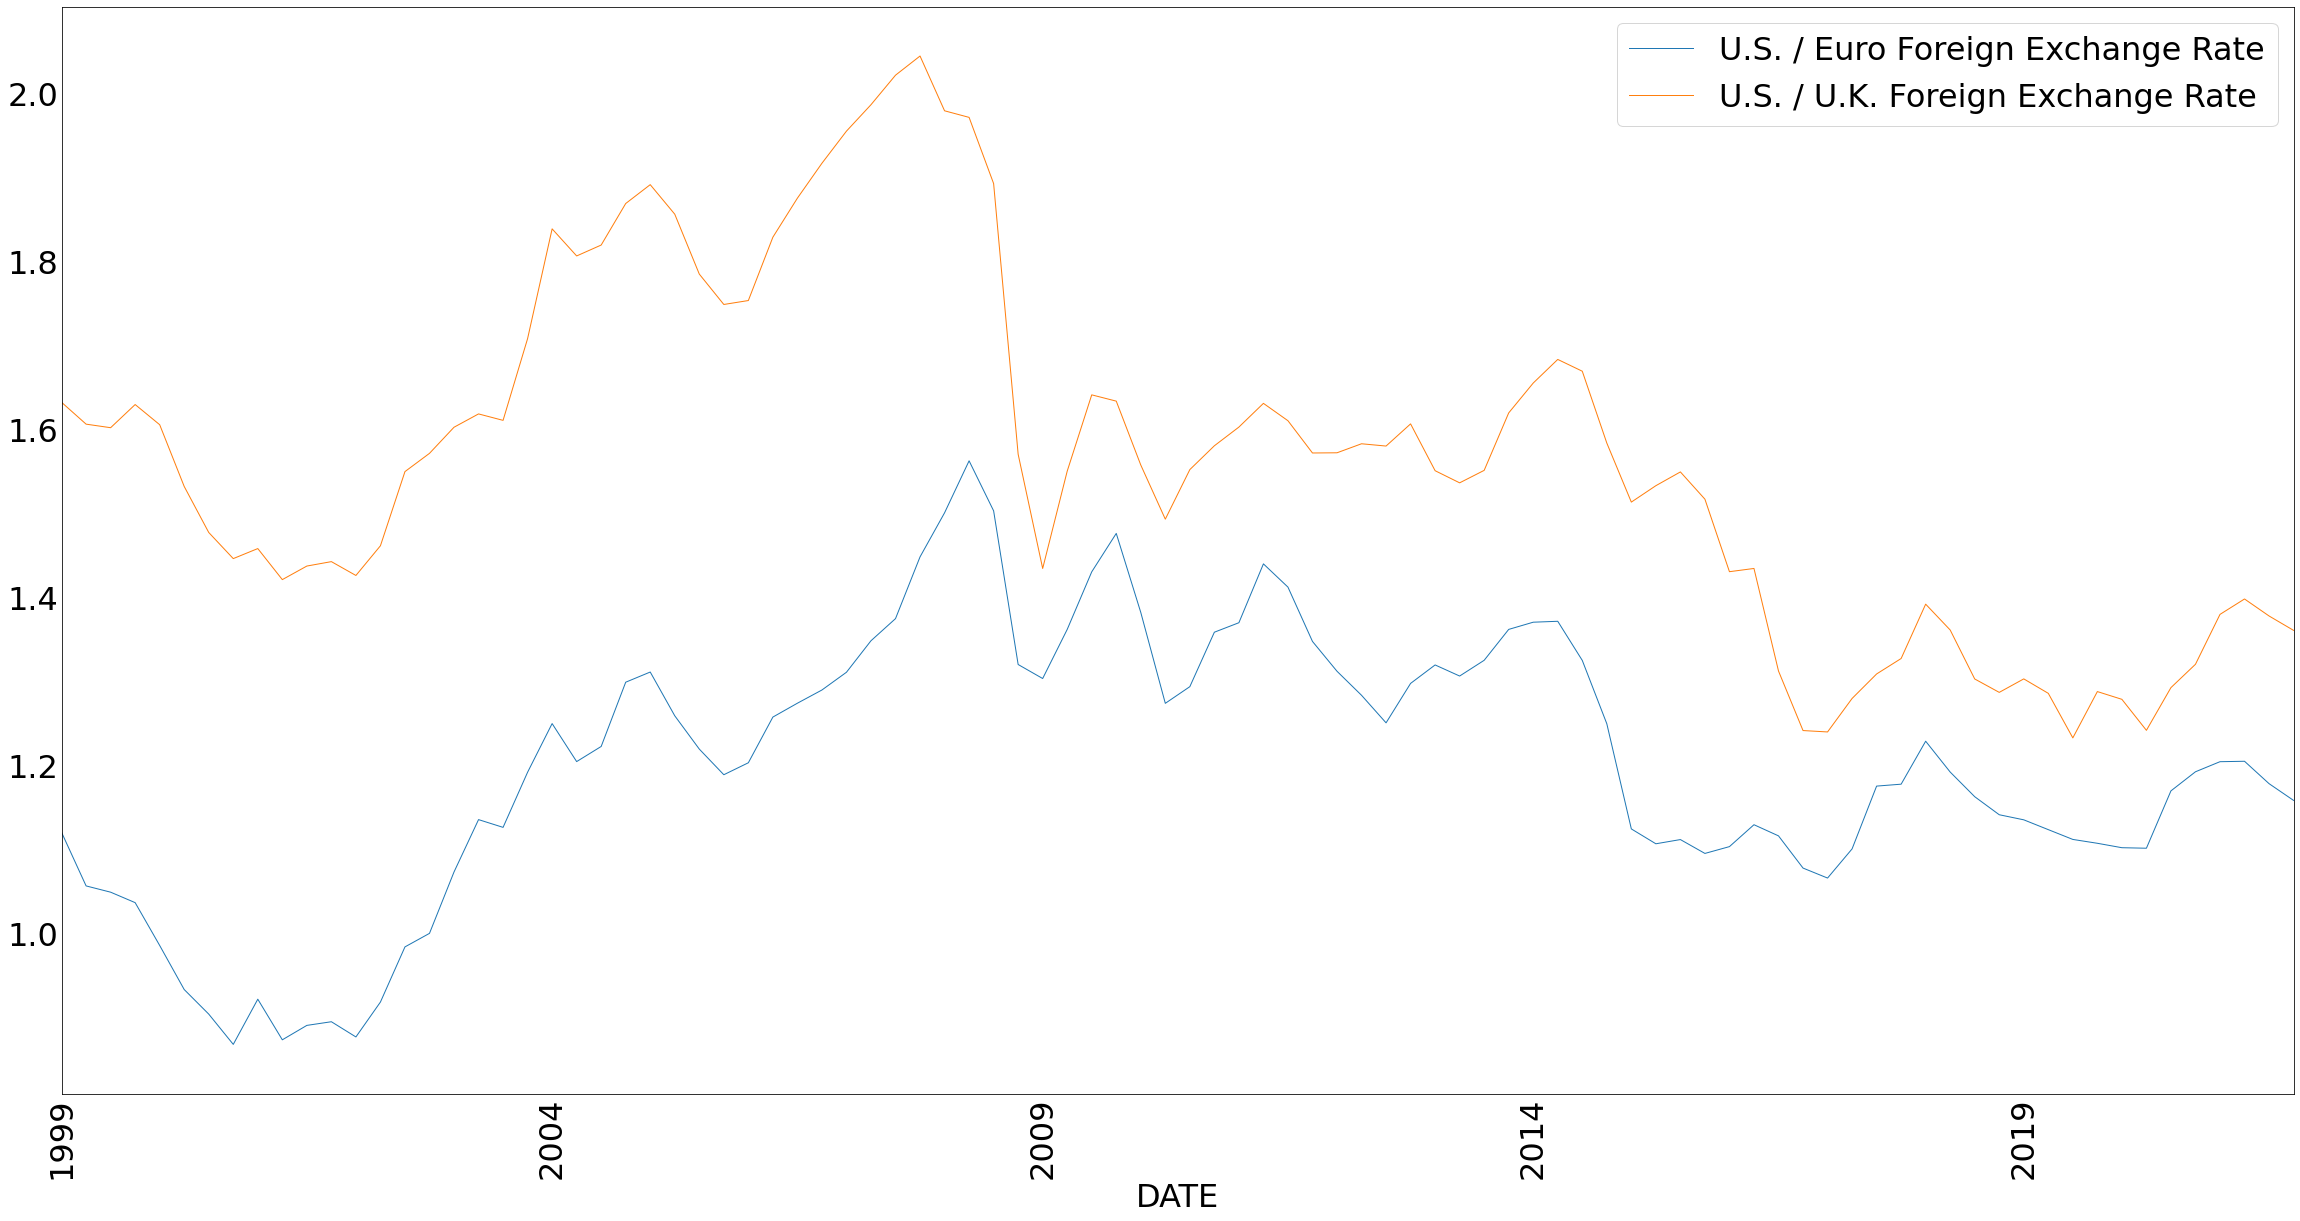

In [197]:
plot_lines(df = dataset3, linewidth = 1, figsize = (40, 20))

## Question 2

In [222]:
data_codes = {"Nominal GDP": "GDP",
               "Real GDP": "GDPC1",
               "CPI": "CPALTT01USM661S",
               "Currency in Circulation": "CURRCIR",
               "Federal Funds Effective Rate": "DFF"}

start = datetime.datetime(1960,1,1)
end = datetime.datetime.today()
freq = "Q"

In [223]:
data = gather_data(data_codes,
                  start,
                  end,
                  freq)

In [224]:
import stats as stat
corr_dict = {}

In [225]:
for key1, vec1 in data.items():
    corr_dict[key1] = {}
    for key2, vec2 in data.items():
        corr_dict[key1][key2] = stat.corr(vec1, vec2)

In [226]:
corr_DF = pd.DataFrame(corr_dict).sort_index(axis = 0).sort_index(axis = 1)

In [227]:
corr_DF.to_csv("data_corr.csv")

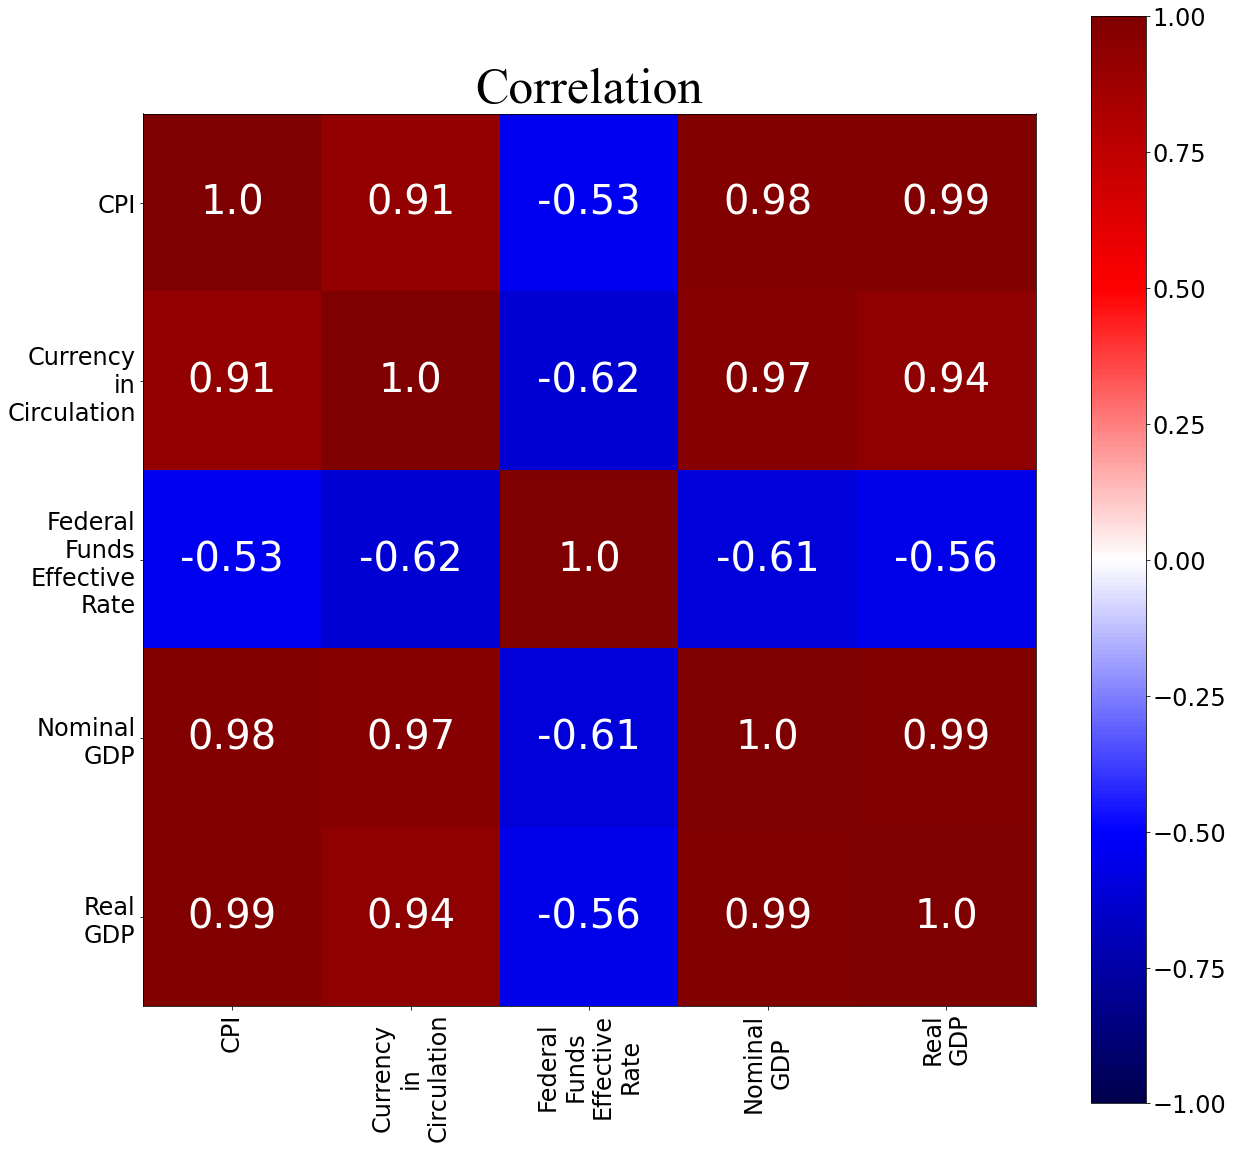

In [228]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# . . .
def corr_matrix_heatmap(data, pp):  
    #Create a figure to visualize a corr matrix  
    fig, ax = plt.subplots(figsize = (20, 20))  
    # use ax.imshow() to create a heatmap of correlation values  
    # seismic mapping shows negative values as blue and positive values as red  
    im = ax.imshow(data, norm = plt.cm.colors.Normalize(-1,1), cmap = "seismic")  
    # create a list of labels, stacking each word in a label by replacing " "  
    # with "\n"  
    labels = data.keys()  
    num_vars = len(labels)  
    tick_labels = [lab.replace(" ", "\n") for lab in labels]  
    # adjust font size according to the number of variables visualized  
    tick_font_size = 120 / num_vars  
    val_font_size = 200 / num_vars  
    plt.rcParams.update({'font.size': tick_font_size}) 
    # prepare space for label of each column  
    x_ticks = np.arange(num_vars)  
    # select labels and rotate them 90 degrees so that they are vertical  
    plt.xticks(x_ticks, tick_labels, fontsize = tick_font_size, rotation = 90)  
    # prepare space for label of each row  
    y_ticks = np.arange(len(labels))  
    # select labels  
    plt.yticks(y_ticks, tick_labels, fontsize = tick_font_size)  
    # show values in each tile of the heatmap  
    for i in range(len(labels)):  
        for j in range(len(labels)):  
            text = ax.text(i, j, str(round(data.values[i][j],2)),  
                           fontsize= val_font_size, ha="center",   
                           va="center", color = "w")  
    #Create title with Times New Roman Font  
    title_font = {"fontname":"Times New Roman"}  
    plt.title("Correlation", fontsize = 50, **title_font)  
    #Call scale to show value of colors 
    cbar = fig.colorbar(im)
    plt.show()
    pp.savefig(fig, bbox_inches="tight")
    plt.close()

#. . . 
# . . .
pp = PdfPages("data.pdf")
corr_data = pd.read_csv("data_corr.csv", index_col = [0])
corr_matrix_heatmap(corr_data, pp)

In [229]:
data = gather_data(data_codes,
                  start,
                  end,
                  "A")

In [230]:
data["Nominal GDP (% change)"] = data["Nominal GDP"].pct_change()
data["Real GDP (% change)"] = data["Real GDP"].pct_change()
data["CPI (% change)"] = data["CPI"].pct_change()
data["Currency in Circulation (% change)"] = data["Currency in Circulation"].pct_change()
data["Federal Funds Effective Rate (% change)"] = data["Federal Funds Effective Rate"].pct_change()

data

,Nominal GDP,Real GDP,CPI,Currency in Circulation,Federal Funds Effective Rate,Nominal GDP (% change),Real GDP (% change),CPI (% change),Currency in Circulation (% change),Federal Funds Effective Rate (% change)
DATE,,,,,,,,,,
1960-12-31,542.38225,3262.06100,12.482227,32.055500,3.211749,NaN,NaN,NaN,NaN,NaN
1961-12-31,562.20975,3345.69025,12.615832,32.502750,1.949671,0.036556,0.025637,0.010704,0.013952,-0.392956
1962-12-31,603.92150,3550.68375,12.764204,33.767417,2.710301,0.074193,0.061271,0.011761,0.038910,0.390133
1963-12-31,637.45150,3705.31775,12.924530,35.496500,3.178740,0.055520,0.043550,0.012561,0.051206,0.172836
1964-12-31,684.46150,3918.79075,13.095404,37.706667,3.496093,0.073747,0.057613,0.013221,0.062264,0.099836
...,...,...,...,...,...,...,...,...,...,...
2017-12-31,19479.62250,18079.08400,103.425282,1555.442667,1.002959,0.041964,0.022557,0.021375,0.067181,1.550781
2018-12-31,20527.15875,18606.78650,105.942752,1661.464000,1.834932,0.053776,0.029189,0.024341,0.068162,0.829518
2019-12-31,21372.58225,19032.67150,107.862551,1745.099167,2.157260,0.041186,0.022889,0.018121,0.050338,0.175663


In [231]:
corr_dict2 = {}
data2 = data[["Nominal GDP (% change)", "Real GDP (% change)", "CPI (% change)", "Currency in Circulation (% change)", "Federal Funds Effective Rate (% change)"]].copy()

In [232]:
data2 = data2.iloc[1: , :]

In [233]:
for key1, vec1 in data2.items():
    corr_dict2[key1] = {}
    for key2, vec2 in data2.items():
        corr_dict2[key1][key2] = stat.corr(vec1, vec2)

In [234]:
corr_DF2 = pd.DataFrame(corr_dict2).sort_index(axis = 0).sort_index(axis = 1)

In [235]:
corr_DF2.to_csv("data_corr2.csv")

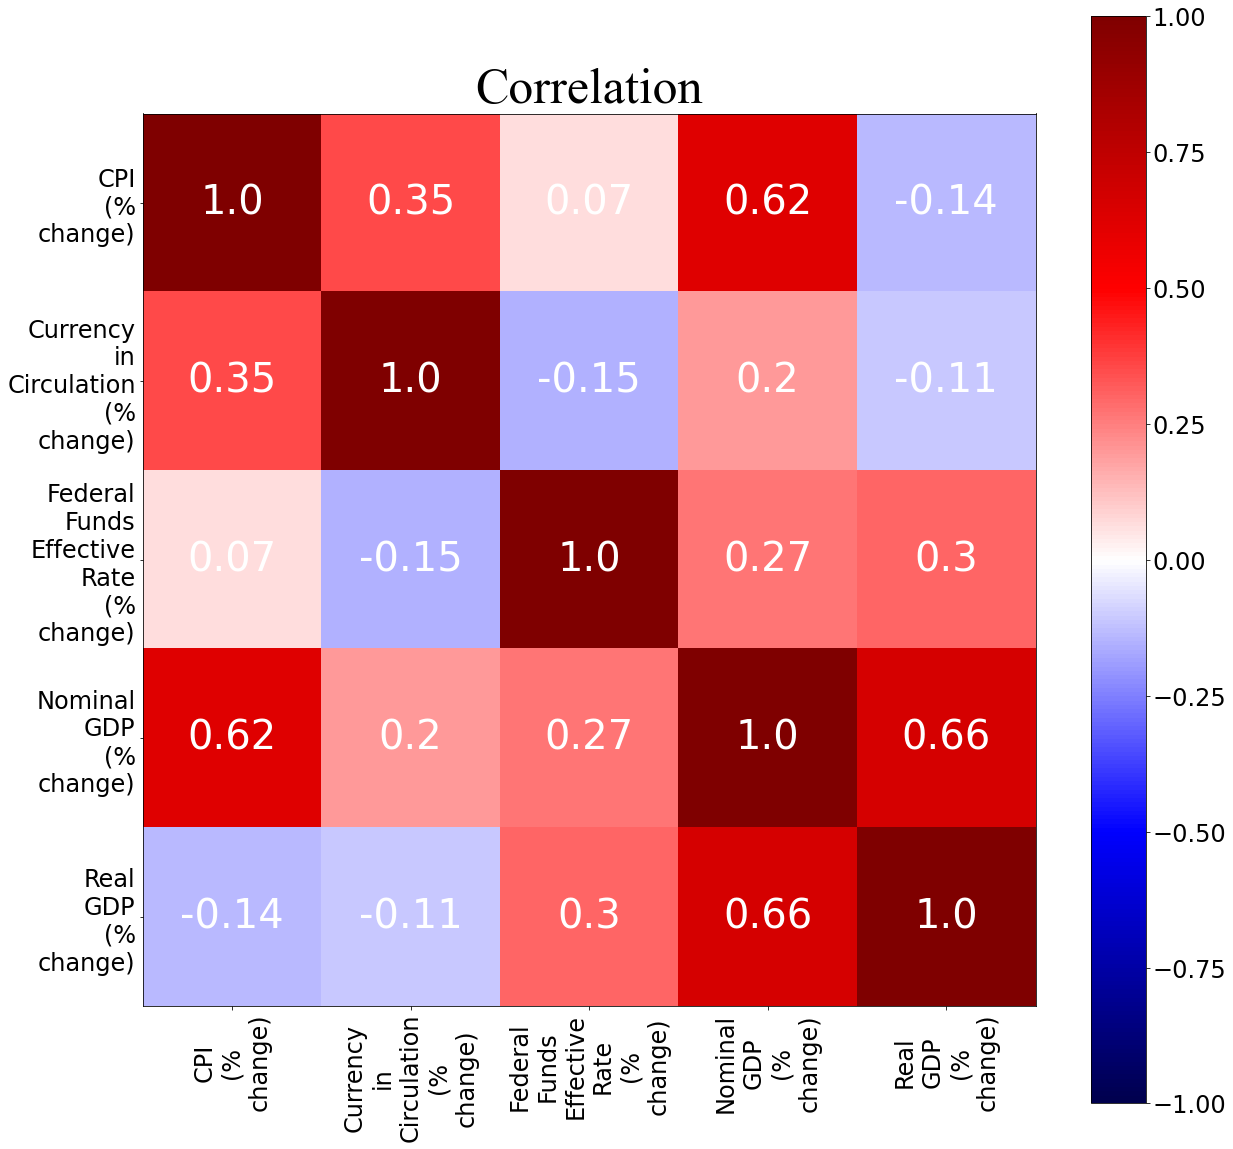

In [237]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# . . .
def corr_matrix_heatmap(data, pp):  
    #Create a figure to visualize a corr matrix  
    fig, ax = plt.subplots(figsize = (20, 20))  
    # use ax.imshow() to create a heatmap of correlation values  
    # seismic mapping shows negative values as blue and positive values as red  
    im = ax.imshow(data, norm = plt.cm.colors.Normalize(-1,1), cmap = "seismic")  
    # create a list of labels, stacking each word in a label by replacing " "  
    # with "\n"  
    labels = data.keys()  
    num_vars = len(labels)  
    tick_labels = [lab.replace(" ", "\n") for lab in labels]  
    # adjust font size according to the number of variables visualized  
    tick_font_size = 120 / num_vars  
    val_font_size = 200 / num_vars  
    plt.rcParams.update({'font.size': tick_font_size}) 
    # prepare space for label of each column  
    x_ticks = np.arange(num_vars)  
    # select labels and rotate them 90 degrees so that they are vertical  
    plt.xticks(x_ticks, tick_labels, fontsize = tick_font_size, rotation = 90)  
    # prepare space for label of each row  
    y_ticks = np.arange(len(labels))  
    # select labels  
    plt.yticks(y_ticks, tick_labels, fontsize = tick_font_size)  
    # show values in each tile of the heatmap  
    for i in range(len(labels)):  
        for j in range(len(labels)):  
            text = ax.text(i, j, str(round(data.values[i][j],2)),  
                           fontsize= val_font_size, ha="center",   
                           va="center", color = "w")  
    #Create title with Times New Roman Font  
    title_font = {"fontname":"Times New Roman"}  
    plt.title("Correlation", fontsize = 50, **title_font)  
    #Call scale to show value of colors 
    cbar = fig.colorbar(im)
    plt.show()
    pp.savefig(fig, bbox_inches="tight")
    plt.close()

#. . . 
# . . .
pp = PdfPages("data2.pdf")
corr_data2 = pd.read_csv("data_corr2.csv", index_col = [0])
corr_matrix_heatmap(corr_data2, pp)

The correlations change because they are comparig the percentage change and not the total value as the total value is likely to have more correlation since in general it 1. is a number of similar sizes to other variables and 2. they are pretty similar every year. But now we see that the percantage change is actually considerably different every year.